<a href="https://colab.research.google.com/github/Ciss48/Retenioneering_4.0-dev-/blob/main/Eventstream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Library

In [1]:
# 1. Gỡ numpy, pandas, matplotlib và các bản build lỗi
!pip uninstall -y numpy pandas matplotlib
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 --force-reinstall

# 2. Cài retentioneering bản RC8
!pip install --pre retentioneering --upgrade


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.5/947.5 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.9/426.9 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.0 MB/s eta 0:00:00
   ━━━━

# Import Library

In [1]:
import numpy
import pandas
import matplotlib
import retentioneering

print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__)
print("retentioneering:", retentioneering.__version__)

numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
retentioneering: 4.0.0rc8


In [2]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

project_id = 'crazy-coffee-jam'

from google.colab import auth
auth.authenticate_user()
# Construct a BigQuery client object.
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

# Prepare data

In [3]:
query = """
select distinct event_name from `crazy-coffee-jam.analytics_483028617.events_intraday_20250616`
where platform = 'ANDROID' and geo. country = 'United States'
"""
list_event = client.query(query).to_dataframe()
# prompt: Sử dụng dataframe list_event: Dòng đầu tiên lọc bỏ đi những dòng chứa số (chỉ cần chứa 1 chữ số ở bất kỳ đâu thôi là bỏ), dòng tiếp theo bỏ đi những event sau: screen_view, win_level_time, all_play_level_time, ad_impression, ad_cgteam_impression, Total_Ads_Revenue, user_engagement, firebase_campaign, app_exception, os_update

# Drop rows that contain any digit in the 'event_name' column
list_event = list_event[~list_event['event_name'].astype(str).str.contains('\d', na=False)]
# Drop specific event names from the 'event_name' column
events_to_drop = ['screen_view', 'win_level_time', 'all_play_level_time', 'ad_impression', 'ad_cgteam_impression', 'Total_Ads_Revenue', 'user_engagement', 'firebase_campaign', 'app_exception', 'os_update','af_rewarded','session_start']
list_event = list_event[~list_event['event_name'].isin(events_to_drop)]


In [4]:
# prompt: Sử dụng dataframe list_event: biến đổi thành list

list_event_str = list_event['event_name'].to_list()
list_event_str = ', '.join([f"'{e}'" for e in list_event_str])  # → 'start_level', 'win_level', 'ad_impression'

# Sau đó gói lại bằng dấu ngoặc
list_event_str = f"({list_event_str})"  # → ('start_level', 'win_level', 'ad_impression')

In [5]:
query = f"""
SELECT
  user_pseudo_id,
  geo.country,
  event_name,
  event_timestamp,
  ev.key,
  COALESCE(ev.value.string_value,
           CAST(ev.value.int_value AS STRING),
           CAST(ev.value.float_value AS STRING),
           CAST(ev.value.double_value AS STRING)
  ) AS value,
  (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_number') as session_number,
FROM
  `crazy-coffee-jam.analytics_483028617.events_intraday_*`,
  UNNEST(event_params) AS ev
WHERE
  _TABLE_SUFFIX BETWEEN '20250606' and '20250610'
  and user_pseudo_id in (select distinct user_pseudo_id from `crazy-coffee-jam.flatten_table.first_open` where event_date between '2025-06-06' and '2025-06-10' )
  and event_name in {list_event_str}
  and key not in ('firebase_event_origin','firebase_screen_class', 'engaged_session_event', 'firebase_screen_id', 'ga_session_id', 'firebase_event_id',
  'engagement_time_msec', 'system_app', 'previous_first_open_count', 'system_app_update', 'firebase_conversion', 'update_with_analytics', 'level_percent','IsLoop',
  'value', 'ad_platform', 'ad_unit_name', 'currency','ad_source', 'box_id')
ORDER BY
  user_pseudo_id,
  event_timestamp
"""
df = client.query(query).to_dataframe()

In [6]:
# prompt: df: Bỏ đi các dòng có cột event_name là resource_gain và cột key = level

df = df.drop(df[(df['event_name'] == 'resource_gain') & (df['key'] == 'level')].index)
df = df.drop(df[(df['event_name'] == 'box_complete') & (df['key'] == 'box_id')].index)
df = df.drop(df[df['key'] == 'ga_session_number'].index)
df = df.drop(df[(df['event_name'] == 'ads_inter_fail') & (df['key'] == 'placement')].index)
df = df.drop(df[(df['event_name'] == 'booster_gain') & (df['key'] == 'level')].index)
df = df.drop(df[(df['event_name'] == 'booster_use') & (df['key'] == 'level')].index)

df = df.drop(df[(df['event_name'] == 'resource_spend') & (df['key'] == 'resource_gain_source')].index)
df = df.drop(df[(df['event_name'] == 'resource_spend') & (df['key'] == 'level')].index)
df = df.drop(df[(df['event_name'] == 'resource_spend') & (df['key'] == 'resource_amount')].index)

df = df.drop(df[(df['event_name'] == 'revive_level') & (df['key'] == 'level')].index)
df = df.drop(df[(df['event_name'] == 'af_rewarded') & (df['key'] == 'level')].index)

In [7]:
import pandas as pd

# Bước 1: Tạo cột event_param mặc định cho toàn bộ df
df['event_param'] = df['event_name'] + "/" + df['value'].astype(str)

# Bước 2: Xử lý các event cần gom value theo timestamp
special_events = ['resource_gain', 'booster_gain', 'booster_use']

# Gom nhóm value của các special_events
agg_df = (
    df[df['event_name'].isin(special_events)]
    .groupby(['user_pseudo_id', 'event_timestamp', 'event_name'])['value']
    .agg(lambda x: '_'.join(sorted(map(str, x))))
    .reset_index()
    .rename(columns={'value': 'joined_value'})
)

# Merge để tạo cột event_param đặc biệt cho các special_events
df = df.merge(agg_df, on=['user_pseudo_id', 'event_timestamp', 'event_name'], how='left')

# Ghi đè lại event_param cho các special_events
df.loc[df['event_name'].isin(special_events), 'event_param'] = (
    df['event_name'] + '/' + df['joined_value']
)

# Xoá cột phụ
df.drop(columns=['joined_value'], inplace=True)

# Bước 3: Chia làm 2 phần: special events và phần còn lại
df_special = df[df['event_name'].isin(special_events)]
df_other = df[~df['event_name'].isin(special_events)]

# Bước 4: Với special events, chỉ giữ các dòng duy nhất theo user, timestamp, event_param
df_special_unique = df_special.drop_duplicates(subset=['user_pseudo_id', 'event_timestamp', 'event_param'])

# Bước 5: Gộp lại toàn bộ dataframe
df_filtered = pd.concat([df_other, df_special_unique], ignore_index=True)
df_filtered = df_filtered.sort_values(by=['user_pseudo_id', 'event_timestamp']).reset_index(drop=True)


In [8]:
# Lọc các event >= event start_level_x
import pandas as pd

def filter_from_level(df, level):
    level_str = f'start_level/{level}'

    # Tìm dòng đầu tiên có start_level/level của từng user
    level_start_time = (
        df[df['event_param'] == level_str]
        .groupby('user_pseudo_id')['event_timestamp']
        .min()
        .reset_index()
        .rename(columns={'event_timestamp': 'min_ts'})
    )

    # Merge lại để biết từng user cần giữ lại từ thời điểm nào
    df = df.merge(level_start_time, on='user_pseudo_id', how='inner')

    # Chỉ giữ lại event từ level đó trở đi (dựa vào timestamp)
    df_filtered = df[df['event_timestamp'] >= df['min_ts']].copy()

    # Xóa cột phụ
    df_filtered.drop(columns=['min_ts'], inplace=True)

    return df_filtered


In [9]:
# Lọc các event < event start_level_x

import pandas as pd

def filter_before_level(df, level):
    level_str = f'start_level/{level}'

    # Tìm thời điểm đầu tiên user chạm tới level đó
    level_start_time = (
        df[df['event_param'] == level_str]
        .groupby('user_pseudo_id')['event_timestamp']
        .min()
        .reset_index()
        .rename(columns={'event_timestamp': 'max_ts'})
    )

    # Merge vào để biết mỗi user cần loại event sau thời điểm nào
    df = df.merge(level_start_time, on='user_pseudo_id', how='inner')

    # Giữ lại những event xảy ra trước khi user reach đến level đó
    df_filtered = df[df['event_timestamp'] < df['max_ts']].copy()

    # Xóa cột phụ
    df_filtered.drop(columns=['max_ts'], inplace=True)

    return df_filtered


In [10]:
df_level_14_onward = filter_from_level(df_filtered, level=20)
df_level_15_on = filter_before_level(df_level_14_onward, level=23)
df_level_15_on

user_pseudo_id        country      event_name  \
0       006bc68441f028b81670192930f1c270  United States     start_level   
1       006bc68441f028b81670192930f1c270  United States    box_complete   
2       006bc68441f028b81670192930f1c270  United States    box_complete   
3       006bc68441f028b81670192930f1c270  United States    box_complete   
4       006bc68441f028b81670192930f1c270  United States    box_complete   
...                                  ...            ...             ...   
655386  fff885dcfadb99e6eb33e281bb84dad8         Brazil    box_complete   
655387  fff885dcfadb99e6eb33e281bb84dad8         Brazil    box_complete   
655388  fff885dcfadb99e6eb33e281bb84dad8         Brazil       win_level   
655389  fff885dcfadb99e6eb33e281bb84dad8         Brazil   resource_gain   
655390  fff885dcfadb99e6eb33e281bb84dad8         Brazil  ads_inter_fail   

         event_timestamp              key                 value  \
0       1749445806169328            level                    20   
1       1749445820971330            level                    20   
2       1749445825538333            level                    20   
3       1749445857855336            level                    20   
4       1749445868932339            level                    20   
...                  ...              ...                   ...   
655386  1749176177982807            level                    22   
655387  1749176181338810            level                    22   
655388  1749176183612811            level                    22   
655389  1749176183615812  resource_amount                    10   
655390  1749176187330814    error_message  error_code_NoNetwork   

        session_number                          event_param  
0                    1                       start_level/20  
1                    1                      box_complete/20  
2                    1                      box_complete/20  
3                    1                      box_complete/20  
4                    1                      box_complete/20  
...                ...                                  ...  
655386               2                      box_complete/22  
655387               2                      box_complete/22  
655388               2                         win_level/22  
655389               2            resource_gain/10_Coin_Win  
655390               2  ads_inter_fail/error_code_NoNetwork  

[85087 rows x 8 columns]

In [11]:
df_retention = df_level_15_on[['user_pseudo_id', 'event_timestamp', 'event_name', 'session_number','country','event_param']]
df_retention = df_retention.dropna()

In [12]:
# Đảm bảo đã được sort theo user và thời gian
df_retention = df_retention.sort_values(by=['user_pseudo_id', 'event_timestamp']).reset_index(drop=True)

# Xác định các dòng box_complete liên tiếp nhau theo từng user
df_retention['is_box_complete'] = df_retention['event_name'] == 'box_complete'
df_retention['prev_is_box_complete'] = df_retention.groupby('user_pseudo_id')['is_box_complete'].shift(1, fill_value=False)

# Đánh dấu các dòng box_complete KHÔNG phải là lặp lại
df_retention['keep_row'] = ~((df_retention['is_box_complete']) & (df_retention['prev_is_box_complete']))

# Lọc giữ lại các dòng cần thiết
df_retention_filtered = df_retention[df_retention['keep_row']].drop(columns=['is_box_complete', 'prev_is_box_complete', 'keep_row'])

# Kết quả
df_retention = df_retention_filtered.reset_index(drop=True)

# Khởi tạo Eventstream

## Khởi tạo

In [13]:
df_retention['event_time'] = pd.to_datetime(df_retention['event_timestamp'], unit='us')  # 'us' = microseconds
df_retention

user_pseudo_id   event_timestamp      event_name  \
0      006bc68441f028b81670192930f1c270  1749445806169328     start_level   
1      006bc68441f028b81670192930f1c270  1749445820971330    box_complete   
2      006bc68441f028b81670192930f1c270  1749445927683362       win_level   
3      006bc68441f028b81670192930f1c270  1749445927685363   resource_gain   
4      006bc68441f028b81670192930f1c270  1749445953663164  ads_inter_show   
...                                 ...               ...             ...   
38247  fff885dcfadb99e6eb33e281bb84dad8  1749176157509825  ads_inter_fail   
38248  fff885dcfadb99e6eb33e281bb84dad8  1749176164659826    box_complete   
38249  fff885dcfadb99e6eb33e281bb84dad8  1749176183612811       win_level   
38250  fff885dcfadb99e6eb33e281bb84dad8  1749176183615812   resource_gain   
38251  fff885dcfadb99e6eb33e281bb84dad8  1749176187330814  ads_inter_fail   

       session_number        country                          event_param  \
0                   1  United States                       start_level/20   
1                   1  United States                      box_complete/20   
2                   1  United States                         win_level/20   
3                   1  United States            resource_gain/30_Coin_Win   
4                   1  United States               ads_inter_show/WinGame   
...               ...            ...                                  ...   
38247               2         Brazil  ads_inter_fail/error_code_NoNetwork   
38248               2         Brazil                      box_complete/22   
38249               2         Brazil                         win_level/22   
38250               2         Brazil            resource_gain/10_Coin_Win   
38251               2         Brazil  ads_inter_fail/error_code_NoNetwork   

                      event_time  
0     2025-06-09 05:10:06.169328  
1     2025-06-09 05:10:20.971330  
2     2025-06-09 05:12:07.683362  
3     2025-06-09 05:12:07.685363  
4     2025-06-09 05:12:33.663164  
...                          ...  
38247 2025-06-06 02:15:57.509825  
38248 2025-06-06 02:16:04.659826  
38249 2025-06-06 02:16:23.612811  
38250 2025-06-06 02:16:23.615812  
38251 2025-06-06 02:16:27.330814  

[38252 rows x 7 columns]

In [14]:
from retentioneering.eventstream import Eventstream

raw_data_schema = {
    'user_id': 'user_pseudo_id',
    'event_name': 'event_name',
    'event_timestamp': 'event_time',
    'custom_cols': [
        {
            'raw_data_col': 'session_number',
            'custom_col': 'session_number'
        },
        {
            'raw_data_col': 'country',
            'custom_col': 'country'
        },
        {
            'raw_data_col': 'event_param',
            'custom_col': 'event_param'
        }
    ]
}

stream = Eventstream(raw_data=df_retention, raw_data_schema=raw_data_schema)


In [15]:
stream_df = stream.to_dataframe()
stream_df

event_id  event_type  event_index  \
0      9d7ecf81-f8ac-4007-9dea-6ee35102e82c  path_start            0   
1      9d7ecf81-f8ac-4007-9dea-6ee35102e82c         raw            0   
2      33460d58-5f98-4c1d-8444-82a08f01d60c         raw            1   
3      a2777fde-23d4-4f1f-861c-609163b4f197         raw            2   
4      865d02b4-9d78-4d2c-91aa-41141d46a1d6         raw            3   
...                                     ...         ...          ...   
40993  f991f944-1b6f-4b47-9900-d8823926f07d         raw        38248   
40994  4c185894-b7a1-44cb-aa10-84d4242d54a1         raw        38249   
40995  8f591195-3bd5-4ba0-b72b-b44183d9a2bc         raw        38250   
40996  0d217e61-5585-4d9e-8e0b-634e5f65901e         raw        38251   
40997  0d217e61-5585-4d9e-8e0b-634e5f65901e    path_end        38251   

                 event                  timestamp  \
0           path_start 2025-06-05 17:28:46.247338   
1          start_level 2025-06-05 17:28:46.247338   
2         box_complete 2025-06-05 17:29:04.414340   
3          booster_use 2025-06-05 17:29:51.455352   
4         box_complete 2025-06-05 17:29:51.743353   
...                ...                        ...   
40993        win_level 2025-06-10 16:54:16.963302   
40994    resource_gain 2025-06-10 16:54:16.970303   
40995   ads_inter_show 2025-06-10 16:54:47.994274   
40996  ads_inter_click 2025-06-10 16:54:48.023280   
40997         path_end 2025-06-10 16:54:48.023280   

                                user_id  session_number  country  \
0      13252ef9b0d92c19efd957a6d6bebe76               1  Finland   
1      13252ef9b0d92c19efd957a6d6bebe76               1  Finland   
2      13252ef9b0d92c19efd957a6d6bebe76               1  Finland   
3      13252ef9b0d92c19efd957a6d6bebe76               1  Finland   
4      13252ef9b0d92c19efd957a6d6bebe76               1  Finland   
...                                 ...             ...      ...   
40993  913d66564af3c06fa229fadd7fdf0172               1   Mexico   
40994  913d66564af3c06fa229fadd7fdf0172               1   Mexico   
40995  913d66564af3c06fa229fadd7fdf0172               1   Mexico   
40996  913d66564af3c06fa229fadd7fdf0172               1   Mexico   
40997  913d66564af3c06fa229fadd7fdf0172               1   Mexico   

                     event_param  
0                 start_level/20  
1                 start_level/20  
2                box_complete/20  
3               booster_use/Fill  
4                box_complete/20  
...                          ...  
40993               win_level/22  
40994  resource_gain/10_Coin_Win  
40995     ads_inter_show/WinGame  
40996    ads_inter_click/WinGame  
40997    ads_inter_click/WinGame  

[40998 rows x 9 columns]

## Giảm mẫu người dùng (User sampling)

 Để giảm chi phí tính toán và làm rõ bức tranh tổng thể khi làm việc với các tập dữ liệu lớn, Eventstream cho phép lấy mẫu các đường dẫn người dùng tại điểm đầu vào (lúc tạo Eventstream). Dữ liệu đã tải lên Eventstream là bất biến, nên đây là cơ hội duy nhất để điều chỉnh kích thước tập dữ liệu. Việc lấy mẫu người dùng đồng nghĩa với việc loại bỏ toàn bộ một số đường dẫn người dùng ngẫu nhiên, nhưng đảm bảo rằng các đường dẫn được lấy mẫu sẽ chứa tất cả các sự kiện từ tập dữ liệu gốc và không bị cắt cụt. Kích thước mẫu có thể được xác định bằng số thập phân (tỷ lệ phần trăm) hoặc số nguyên (số lượng sự kiện) thông qua tham số user_sample_size. Tham số user_sample_seed được sử dụng để làm cho quá trình lấy mẫu ngẫu nhiên có thể tái tạo.

In [ ]:
sampled_stream = Eventstream(raw_data=df_retention,
                             raw_data_schema=raw_data_schema,
                             user_sample_size=0.1,
                             user_sample_seed=42)


print('Original number of the events:', len(stream_df))
print('Sampled number of the events:', len(sampled_stream.to_dataframe()))

unique_users_original = stream_df['user_id'].nunique()
unique_users_sampled = sampled_stream.to_dataframe()['user_id'].nunique()

print('Original unique users number: ', unique_users_original)
print('Sampled unique users number: ', unique_users_sampled)

Original number of the events: 398793
Sampled number of the events: 42533
Original unique users number:  2419
Sampled unique users number:  241


## Display

Các cột trong DataFrame kết quả bao gồm:
-  user_id, event, timestamp và các cột tùy chỉnh (Custom columns): Đây là những cột dữ liệu gốc mà bạn đã cung cấp khi khởi tạo Eventstream. Nếu bạn đã định nghĩa các cột tùy chỉnh (custom_cols), chúng cũng sẽ được hiển thị ở đây.
-  Các cột kỹ thuật (Technical columns): Ngoài các cột dữ liệu gốc, Eventstream thêm vào một số cột để quản lý và tổ chức dữ liệu:
  - event_type: Cột này cho biết loại của một sự kiện. Các sự kiện đến từ DataFrame nguồn ban đầu sẽ có loại là raw (thô). Tuy nhiên, các phương pháp tiền xử lý (preprocessing methods) có thể thêm vào các "sự kiện tổng hợp" (synthetic events) với nhiều loại sự kiện khác nhau.
  - event_index: Đây là một số nguyên được liên kết với thứ tự của sự kiện. Mặc định, Eventstream được sắp xếp theo timestamp và tùy chọn theo cột event. Đối với các sự kiện tổng hợp thường được đặt ở đầu hoặc cuối hành trình của người dùng, một cách sắp xếp đặc biệt sẽ được áp dụng. Điều quan trọng cần lưu ý là event_index có thể có các giá trị trùng lặp, điều này là bình thường do thiết kế của nó.

In [ ]:
stream_df = stream.to_dataframe()
stream_df

event_id  event_type  event_index  \
0       ab50f195-db53-48dd-bb62-9397250dc204  path_start            0   
1       ab50f195-db53-48dd-bb62-9397250dc204         raw            0   
2       48f60961-3794-43df-8fca-f7aa9dae0007         raw            1   
3       8c1884d6-5b60-4236-9bee-bdf19c10309d         raw            2   
4       abed094e-6e7b-4a37-b484-6ae4c6fec7c8         raw            3   
...                                      ...         ...          ...   
398788  d23e4e47-b720-45c8-a92b-f143c60b9620    path_end       393952   
398789  2fb1cb72-b15f-4427-8ce3-80ce2b5d1977         raw       393953   
398790  2fb1cb72-b15f-4427-8ce3-80ce2b5d1977    path_end       393953   
398791  437f97b7-e2cf-49bc-94ec-841cedf2a723         raw       393954   
398792  437f97b7-e2cf-49bc-94ec-841cedf2a723    path_end       393954   

                event                  timestamp  \
0          path_start 2025-06-05 17:21:55.265204   
1         start_level 2025-06-05 17:21:55.265204   
2        box_complete 2025-06-05 17:22:04.992206   
3           win_level 2025-06-05 17:23:15.452228   
4       resource_gain 2025-06-05 17:23:15.452229   
...               ...                        ...   
398788       path_end 2025-06-10 16:59:56.334386   
398789    start_level 2025-06-10 16:59:57.341912   
398790       path_end 2025-06-10 16:59:57.341912   
398791    start_level 2025-06-10 16:59:58.004943   
398792       path_end 2025-06-10 16:59:58.004943   

                                 user_id  session_number  
0       13252ef9b0d92c19efd957a6d6bebe76               1  
1       13252ef9b0d92c19efd957a6d6bebe76               1  
2       13252ef9b0d92c19efd957a6d6bebe76               1  
3       13252ef9b0d92c19efd957a6d6bebe76               1  
4       13252ef9b0d92c19efd957a6d6bebe76               1  
...                                  ...             ...  
398788  E163EE6A3FBB4E309CCFEC4649EC8D7B               6  
398789  c1e122f9bb13e06d92c343dcb88c8dc8              10  
398790  c1e122f9bb13e06d92c343dcb88c8dc8              10  
398791  6a0b1c30c53cef644410c6eb1e6142b9               3  
398792  6a0b1c30c53cef644410c6eb1e6142b9               3  

[398793 rows x 7 columns]

## Describe

In [ ]:
# Overall describe
stream.describe()

value
category          metric                                 
overall           unique_users                       2419
                  unique_events                        22
                  eventstream_start   2025-06-05 17:21:55
                  eventstream_end     2025-06-10 16:59:58
                  eventstream_length      4 days 23:38:03
path_length_time  mean                    0 days 20:15:08
                  std                     1 days 02:26:49
                  median                  0 days 07:12:05
                  min                     0 days 00:00:00
                  max                     4 days 22:56:18
path_length_steps mean                             164.86
                  std                              300.17
                  median                             72.0
                  min                                   3
                  max                                4130

In [ ]:
# Describe event
stream.describe_events()


basic_statistics               \
                    number_of_occurrences unique_users   
event                                                    
ad_reward                            3482          250   
ads_inter_click                     15953         1596   
ads_inter_fail                      51036          469   
ads_inter_show                      26762         1945   
ads_reward_click                     9918          786   
ads_reward_complete                 16558         1001   
ads_reward_fail                      8768          375   
booster_gain                         4174          512   
booster_use                          7383         1310   
box_complete                        81001         2398   
heart_refill                         1054          323   
in_app_purchase                       105            5   
in_app_rating                         148          148   
lose_level                           5630         1130   
out_of_heart                          639          219   
path_end                             2419         2419   
path_start                           2419         2419   
resource_gain                       46368         2280   
resource_spend                       8704         1499   
revive_level                        12812         1204   
start_level                         52501         2419   
win_level                           40959         2263   

                                                                      \
                    number_of_occurrences_shared unique_users_shared   
event                                                                  
ad_reward                                   0.01                0.10   
ads_inter_click                             0.04                0.66   
ads_inter_fail                              0.13                0.19   
ads_inter_show                              0.07                0.80   
ads_reward_click                            0.02                0.32   
ads_reward_complete                         0.04                0.41   
ads_reward_fail                             0.02                0.16   
booster_gain                                0.01                0.21   
booster_use                                 0.02                0.54   
box_complete                                0.20                0.99   
heart_refill                                0.00                0.13   
in_app_purchase                             0.00                0.00   
in_app_rating                               0.00                0.06   
lose_level                                  0.01                0.47   
out_of_heart                                0.00                0.09   
path_end                                    0.01                1.00   
path_start                                  0.01                1.00   
resource_gain                               0.12                0.94   
resource_spend                              0.02                0.62   
revive_level                                0.03                0.50   
start_level                                 0.13                1.00   
win_level                                   0.10                0.94   

                         time_to_FO_user_wise                            \
                                         mean                       std   
event                                                                     
ad_reward           0 days 16:20:08.180318896 0 days 20:23:32.302437243   
ads_inter_click     0 days 03:57:55.066817803 0 days 10:42:03.979821472   
ads_inter_fail      0 days 05:51:46.228926825 0 days 15:05:05.823044033   
ads_inter_show      0 days 02:18:22.131214694 0 days 08:02:44.271453816   
ads_reward_click    0 days 11:40:21.305850733 0 days 17:16:18.370902685   
ads_reward_complete 0 days 09:28:01.417009258 0 days 15:55:20.470322612   
ads_reward_fail     0 days 07:30:01.294628117 0 days 16:26:10.639807857   
booster_gain        0 d

In [ ]:
# Chọn 1 vài event để xem
stream.describe_events(event_list=['start_level', 'win_level'])

basic_statistics                                            \
            number_of_occurrences unique_users number_of_occurrences_shared   
event                                                                         
start_level                 52501         2419                         0.13   
win_level                   40959         2263                         0.10   

                                     time_to_FO_user_wise  \
            unique_users_shared                      mean   
event                                                       
start_level                1.00           0 days 00:00:00   
win_level                  0.94 0 days 00:45:35.286528679   

                                                              \
                                  std                 median   
event                                                          
start_level           0 days 00:00:00        0 days 00:00:00   
win_level   0 days 04:15:05.998657990 0 days 00:02:26.527034   

                                                           \
                               min                    max   
event                                                       
start_level        0 days 00:00:00        0 days 00:00:00   
win_level   0 days 00:00:10.953999 2 days 21:09:42.730182   

            steps_to_FO_user_wise                        
                             mean   std median min  max  
event                                                    
start_level                  1.00  0.00    1.0   1    1  
win_level                    6.34  9.94    3.0   3  189

In [ ]:
# Chọn 1 vài event để xem theo chiều khác
stream.describe_events(event_list=['start_level', 'win_level','ads_reward_complete', 'resource_spend', 'path_start', 'path_end']).T

event                                                     ads_reward_complete  \
basic_statistics      number_of_occurrences                             16558   
                      unique_users                                       1001   
                      number_of_occurrences_shared                       0.04   
                      unique_users_shared                                0.41   
time_to_FO_user_wise  mean                          0 days 09:28:01.417009258   
                      std                           0 days 15:55:20.470322612   
                      median                           0 days 01:17:19.160175   
                      min                              0 days 00:01:51.306042   
                      max                              4 days 16:19:51.922007   
steps_to_FO_user_wise mean                                              90.78   
                      std                                              159.63   
                      median                                             56.0   
                      min                                                   3   
                      max                                                2242   

event                                                                path_end  \
basic_statistics      number_of_occurrences                              2419   
                      unique_users                                       2419   
                      number_of_occurrences_shared                       0.01   
                      unique_users_shared                                 1.0   
time_to_FO_user_wise  mean                          0 days 20:15:08.458765624   
                      std                           1 days 02:26:48.889100744   
                      median                           0 days 07:12:04.589436   
                      min                                     0 days 00:00:00   
                      max                              4 days 22:56:17.578990   
steps_to_FO_user_wise mean                                             163.86   
                      std                                              300.17   
                      median                                             71.0   
                      min                                                   2   
                      max                                                4129   

event                                                    path_start  \
basic_statistics      number_of_occurrences                    2419   
                      unique_users                             2419   
                      number_of_occurrences_shared             0.01   
                      unique_users_shared                       1.0   
time_to_FO_user_wise  mean                          0 days 00:00:00   
                      std                           0 days 00:00:00   
                      median                        0 days 00:00:00   
                      min                           0 days 00:00:00   
                      max                           0 days 00:00:00   
steps_to_FO_user_wise mean                                      0.0   
                      std                                       0.0   
                      median                                    0.0   
                      min                                         0   
                      max                                         0   

event                                                          resource_spend  \
basic_statistics      number_of_occurrences                              8704   
                      unique_users                                       1499   
                      number_of_occurrences_shared                       0.02   
                      unique_users_shared                                0.62   
time_to_FO_user_wise  mean                          0 days 06:31:52.832999969   
                

## Time - based histogram

### User lifttime

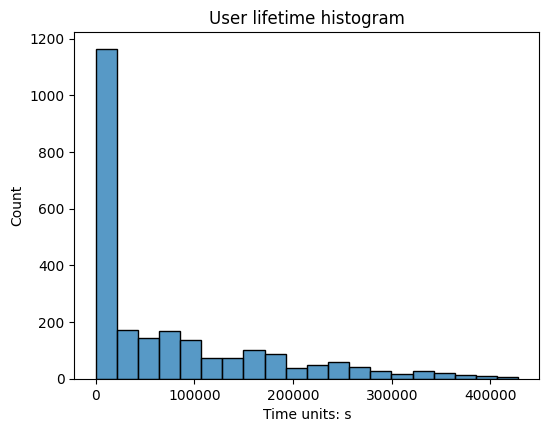

In [ ]:
stream.user_lifetime_hist()


/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/user_lifetime_hist/user_lifetime_hist.py:72: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx &= series <= series.quantile(self.upper_cutoff_quantile)


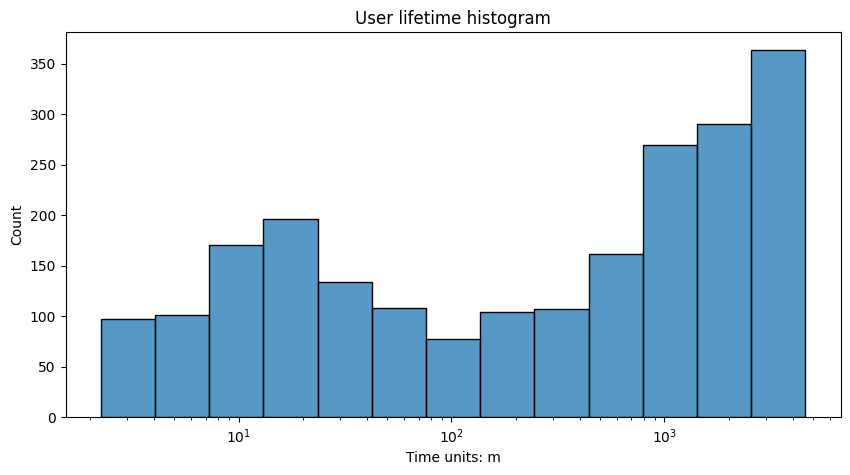

In [ ]:
stream.user_lifetime_hist(
    timedelta_unit='m',               # Đơn vị thời gian: 's', 'm', 'h', 'd', 'W'...
    log_scale=True,                   # Dùng trục log cho histogram
    lower_cutoff_quantile=0.05,       # Cắt bỏ 5% người dùng có lifetime ngắn nhất
    upper_cutoff_quantile=0.95,       # Cắt bỏ 5% người dùng có lifetime dài nhất
    bins= 'auto',                          # Số lượng bin của histogram (có thể là int hoặc quy tắc như 'auto', 'fd', 'sturges')
    width=10,                         # Chiều rộng biểu đồ (inch)
    height=5                          # Chiều cao biểu đồ (inch)
)


/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/user_lifetime_hist/user_lifetime_hist.py:72: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx &= series <= series.quantile(self.upper_cutoff_quantile)


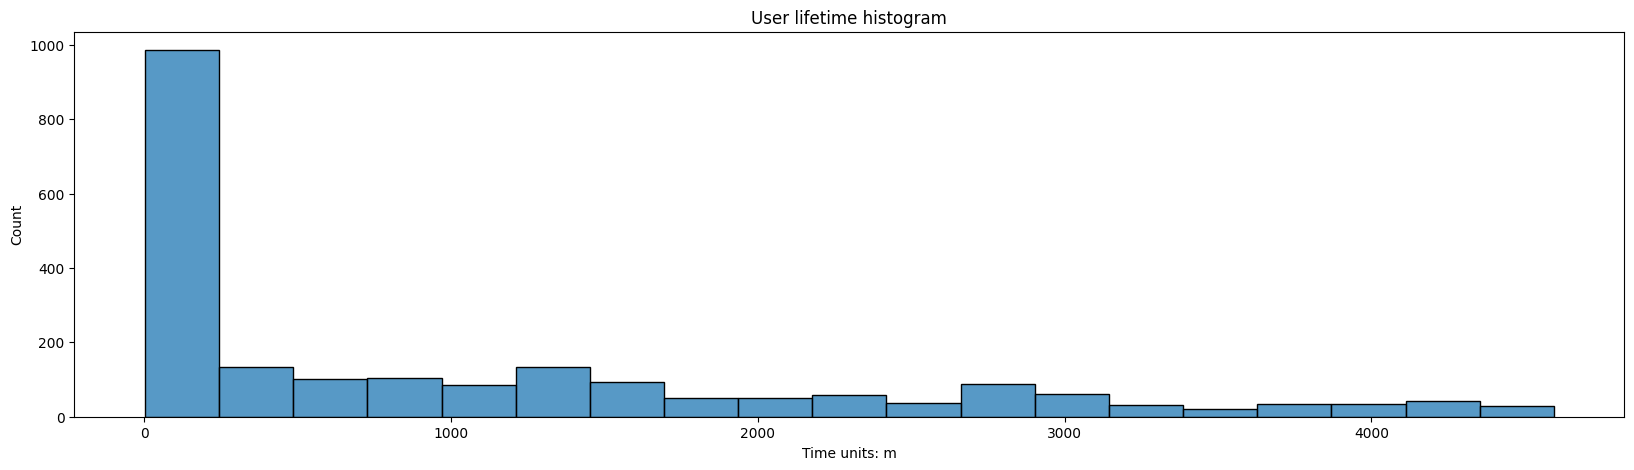

In [ ]:
stream.user_lifetime_hist(
    timedelta_unit='m',               # Đơn vị thời gian: 's', 'm', 'h', 'd', 'W'...
    log_scale=False,                   # Dùng trục log cho histogram
    lower_cutoff_quantile=0.05,       # Cắt bỏ 5% người dùng có lifetime ngắn nhất
    upper_cutoff_quantile=0.95,       # Cắt bỏ 5% người dùng có lifetime dài nhất
    bins= 'auto',                          # Số lượng bin của histogram (có thể là int hoặc quy tắc như 'auto', 'fd', 'sturges')
    width=20,                         # Chiều rộng biểu đồ (inch)
    height=5                          # Chiều cao biểu đồ (inch)
)

### Timedelta between two events

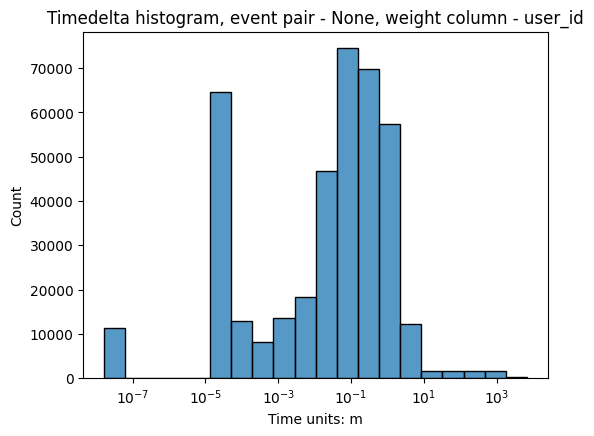

In [ ]:
stream.timedelta_hist(log_scale=True, timedelta_unit='m') # Tính timedelta giữa tất cả các sự kiện

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/timedelta_hist/timedelta_hist.py:107: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx &= series <= series.quantile(self.upper_cutoff_quantile)


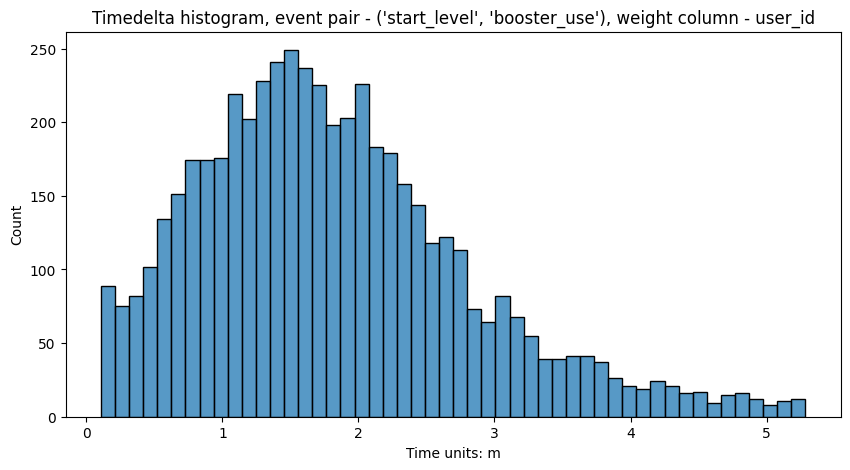

In [ ]:
stream.timedelta_hist(
    event_pair=('start_level', 'booster_use'),  # Cặp sự kiện cần tính khoảng cách thời gian
    adjacent_events_only=False,                 # Cho phép có các sự kiện xen giữa (không bắt buộc liền kề)
    raw_events_only=True,                       # Loại bỏ synthetic events nếu có (cho kết quả “thật” hơn)
    timedelta_unit='m',                         # Đơn vị thời gian tính khoảng cách: 'm' là phút
    lower_cutoff_quantile=0.01,                 # Loại bỏ 1% giá trị nhỏ nhất (dễ là noise)
    upper_cutoff_quantile=0.95,                 # Loại bỏ 1% giá trị lớn nhất (outliers)
    bins=50,                                    # Số lượng bin của biểu đồ tần suất
    width=10, height=5                          # Kích thước biểu đồ
)


/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/timedelta_hist/timedelta_hist.py:107: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx &= series <= series.quantile(self.upper_cutoff_quantile)


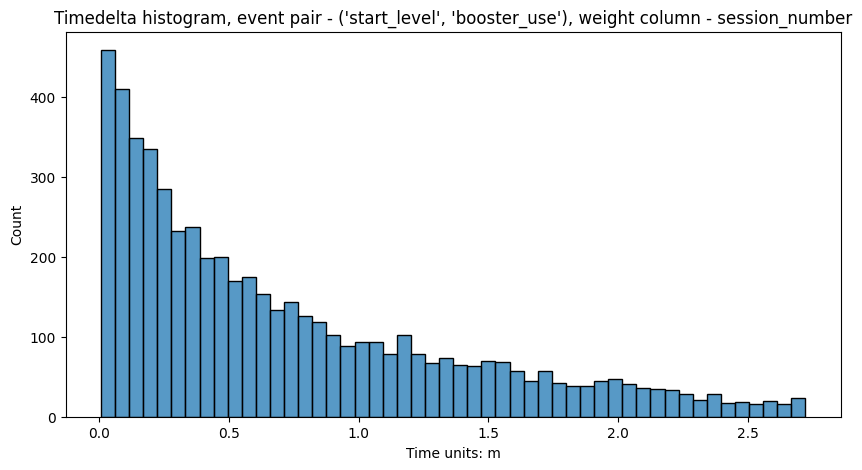

In [ ]:
stream.timedelta_hist(
    event_pair=('start_level', 'booster_use'),  # Cặp sự kiện cần tính khoảng cách thời gian
    adjacent_events_only=False,                 # Cho phép có các sự kiện xen giữa (không bắt buộc liền kề)
    raw_events_only=True,                       # Loại bỏ synthetic events nếu có (cho kết quả “thật” hơn)
    timedelta_unit='m',                         # Đơn vị thời gian tính khoảng cách: 'm' là phút
    lower_cutoff_quantile=0.01,                 # Loại bỏ 1% giá trị nhỏ nhất (dễ là noise)
    upper_cutoff_quantile=0.95,                 # Loại bỏ 1% giá trị lớn nhất (outliers)
    bins=50,                                    # Số lượng bin của biểu đồ tần suất
    width=10, height=5,                         # Kích thước biểu đồ
    weight_col='session_number'                 # Tính trung bình time theo session
)


Giải thích weight_col:

Product | Sequence | Δtime (start_level → booster_use) | Với weight_col='session_id'

A	      | product1 → X → cart	| 10 phút | 	10 phút (1 lần)|

B	product1 → X → cart → product1 → cart	2 phút, 5 phút	mean = 3.5 phút (1 lần)

C	product1 → product1 → cart	1 phút, 1 phút	mean = 1 phút (1 lần)

→ Kết quả cuối cùng có 3 điểm dữ liệu (A, B, C) thay vì 5 nếu không dùng weight_col.


### stream_with_synthetic

In [ ]:
stream_with_synthetic = stream.add_start_end_events().split_sessions(timeout=(30, 'm'))
# add_start_end_events: Thêm 2 synthetic events: path_start: đánh dấu đầu mỗi user path; path_end: đánh dấu cuối mỗi user path.
# .split_sessions(timeout=(30, 'm')): Cắt mỗi user path thành nhiều session nhỏ, nếu giữa 2 sự kiện có khoảng cách ≥ 30 phút -> Giúp phân tích hành vi theo từng phiên chơi.

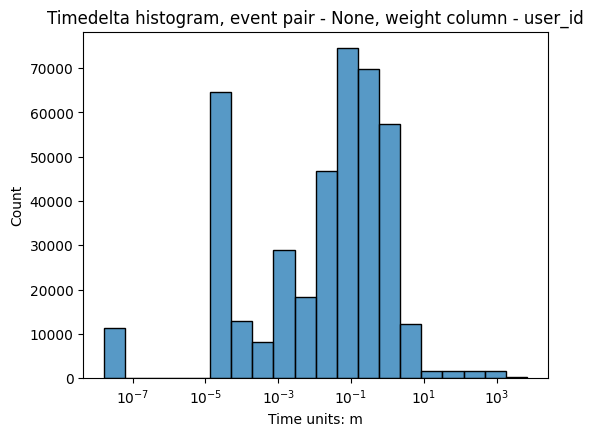

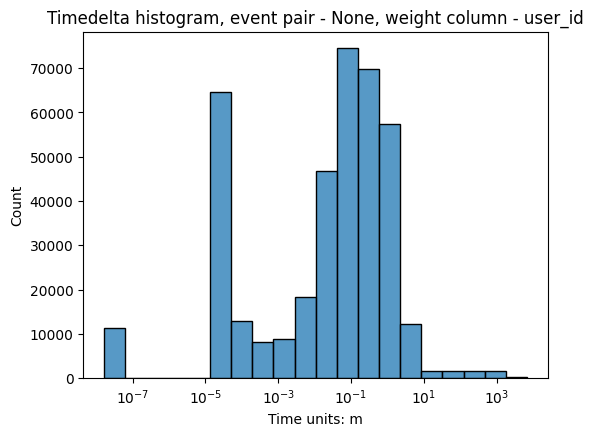

In [ ]:
stream_with_synthetic.timedelta_hist(log_scale=True, timedelta_unit='m') # Vẽ histogram về thời gian giữa các sự kiện liền kề sau khi synthetic
stream_with_synthetic.timedelta_hist(
    raw_events_only=True, # Loại bỏ synthetic events như path_start, path_end, hoặc các sự kiện bạn tự thêm bằng .add_event()
    log_scale=True, #
    timedelta_unit='m'
)

### Eventstream global events

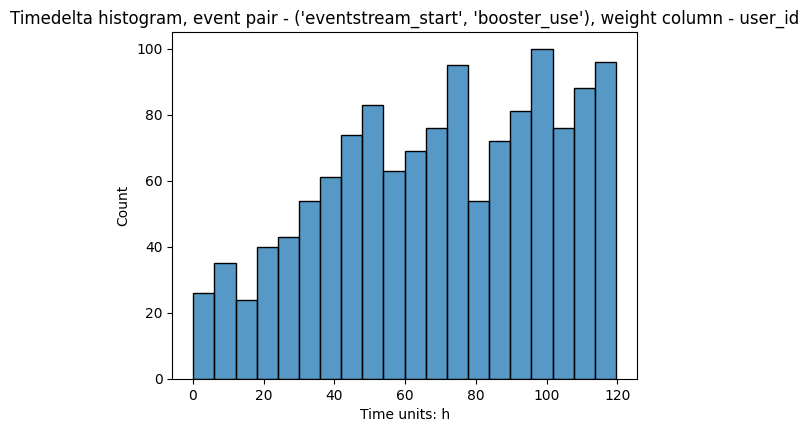

In [ ]:
stream.timedelta_hist(
        event_pair=('eventstream_start', 'booster_use'), # Tính tất cả time delta từ event_start đến lúc booster_use
        timedelta_unit='h',
        adjacent_events_only=False
    )

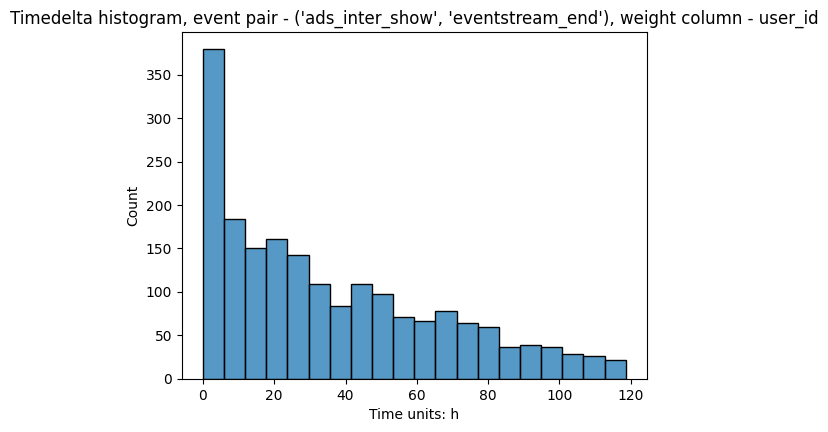

In [ ]:
stream.timedelta_hist(
        event_pair=('ads_inter_show', 'eventstream_end'), # Tính tất cả time delta từ show ad inter đến lúc end ko làm gì
        timedelta_unit='h',
        adjacent_events_only=False
    )

### Event intensity

Phương thức này hiển thị biểu đồ tần suất về cách các sự kiện được phân phối theo thời gian

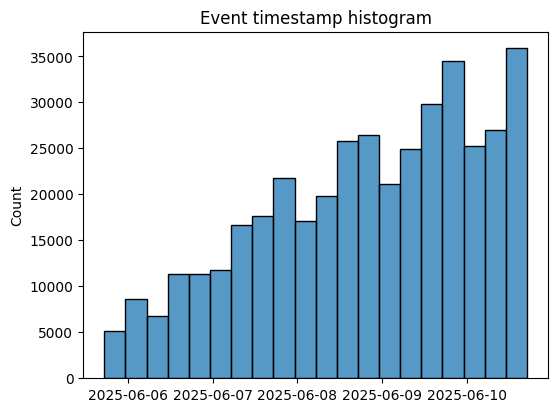

In [ ]:
stream.event_timestamp_hist()

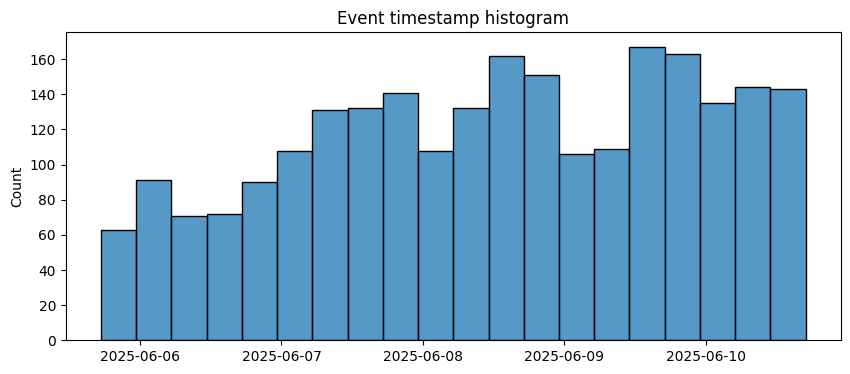

In [ ]:
stream.add_start_end_events().event_timestamp_hist(
    event_list=['path_start'], # Chỉ Hiển thị biểu đồ phân phối theo thời gian (timestamp) của các sự kiện trong event_list
    width=10,
    height=4
)


### Path metrics

Path metrics (các chỉ số đường dẫn) là một nhóm các phương pháp cho phép bạn tính toán các chỉ số tùy chỉnh trên từng đường dẫn người dùng



In [ ]:
metrics = [
    ('len', 'path_length'), # 	Số lượng sự kiện trong mỗi path (chiều dài hành trình).
    ('has:booster_use', 'has_booster_use'), # Cờ True/False: hành trình đó có chứa event "booster_use" không?
    ('time_to:booster_use', 'time_to_booster_use'), # Khoảng thời gian từ event đầu tiên đến khi gặp "booster_use" (tính bằng đơn vị thời gian mặc định).
    (lambda _df: (_df['event'] == 'booster_use').sum(), 'booster_use_count'), # Đếm số lần sự kiện "booster_use" xuất hiện trong mỗi path.
    (pd.NamedAgg('timestamp', lambda s: len(s.dt.date.unique())), 'active_days') # Tính số ngày hoạt động của mỗi path (dựa vào timestamp).
]
stream.path_metrics(metrics)

path_length  has_booster_use  \
000bf37921eebc0202d5c6427b182246           48             True   
003e2b99ae7f3992ee861c5549535743           48             True   
006bc68441f028b81670192930f1c270          116             True   
007f17cfa6f9a2483e73dda976a44c6e         3695             True   
00a0f2322dd37d13e4f5367db8953ea2            8            False   
...                                       ...              ...   
ffdb15a2a5438c16c7df6d03d5856074          159             True   
ffe07798a4fd9d1fbc703bd0871025af          104             True   
fff46e0ab4281e022f8aa1b25c171ba2           33             True   
fff4afc808004bd86af341b092421e77            6            False   
fff885dcfadb99e6eb33e281bb84dad8         1257             True   

                                    time_to_booster_use  booster_use_count  \
000bf37921eebc0202d5c6427b182246 0 days 00:07:19.821121                  1   
003e2b99ae7f3992ee861c5549535743 0 days 00:18:01.531495                  1   
006bc68441f028b81670192930f1c270 0 days 00:20:32.591908                  3   
007f17cfa6f9a2483e73dda976a44c6e 0 days 06:32:18.610358                 22   
00a0f2322dd37d13e4f5367db8953ea2                    NaT                  0   
...                                                 ...                ...   
ffdb15a2a5438c16c7df6d03d5856074 0 days 00:01:02.753011                  6   
ffe07798a4fd9d1fbc703bd0871025af 0 days 00:16:38.352115                  5   
fff46e0ab4281e022f8aa1b25c171ba2 1 days 02:31:51.384433                  1   
fff4afc808004bd86af341b092421e77                    NaT                  0   
fff885dcfadb99e6eb33e281bb84dad8 0 days 00:14:22.211255                  5   

                                  active_days  
000bf37921eebc0202d5c6427b182246            1  
003e2b99ae7f3992ee861c5549535743            1  
006bc68441f028b81670192930f1c270            1  
007f17cfa6f9a2483e73dda976a44c6e            4  
00a0f2322dd37d13e4f5367db8953ea2            1  
...                                       ...  
ffdb15a2a5438c16c7df6d03d5856074            4  
ffe07798a4fd9d1fbc703bd0871025af            1  
fff46e0ab4281e022f8aa1b25c171ba2            2  
fff4afc808004bd86af341b092421e77            1  
fff885dcfadb99e6eb33e281bb84dad8            6  

[2419 rows x 5 columns]

# Data processors

## Adding processors

### AddStartEndEvents

- Thêm hai sự kiện nhân tạo path_start và path_end vào đầu và cuối mỗi đường dẫn của người dùng.
- Các sự kiện này có cùng dấu thời gian (timestamp) với sự kiện đầu tiên và cuối cùng tương ứng.
- Được khuyến nghị sử dụng mỗi khi phân tích eventstream vì nó định rõ ranh giới của eventstream, giúp hiển thị đường dẫn người dùng và tính toán vòng đời người dùng

In [ ]:
res = stream.add_start_end_events().to_dataframe()
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246']

event_id  event_type  event_index  \
92887  eccac658-c0e1-4382-ae2f-3e419b8907af  path_start        91755   
92888  eccac658-c0e1-4382-ae2f-3e419b8907af         raw        91755   
92904  9cb4e7e5-9226-4f6e-a037-5a49d7ad107a         raw        91771   
92932  2e2a6f22-d5d4-4ecb-bda8-6c2da2c72e42         raw        91799   
92933  ff21fa6d-afa9-4ffc-9033-dd7400b049a4         raw        91800   
92943  ac8acf3f-c535-4f94-bed5-b37fc193678a         raw        91810   
92987  01ffc7ba-f94c-480c-a36d-d540c7760352         raw        91853   
92988  5674cf8a-6548-4caa-829d-3600f690e65f         raw        91854   
92990  addc5e48-139b-4fa8-aeba-4e0e76e94952         raw        91856   
92992  6cb2dbdf-ec26-4520-b662-8edf17774ff9         raw        91858   
92994  5b96ff2c-20cd-439d-9c8f-2f33aa98d823         raw        91860   
93002  aabac15f-735e-46a7-bafa-994713a3f74c         raw        91868   
93038  ed380107-552a-4b9e-bc32-af94529c3ee4         raw        91904   
93039  a18b5c30-1cbd-498e-aa9f-0feb822f58e9         raw        91905   
93044  31507be8-3eec-411c-8bff-efa587f817bf         raw        91910   
93051  0028d445-09e6-459a-9bce-2692a3beb0ae         raw        91917   
93067  2d1c4b8f-edc1-4eb8-b837-04f12fdaab93         raw        91933   
93068  960301b9-1cfb-4030-b044-6b8c4c29ba2a         raw        91934   
93070  2c274539-6d68-4497-b152-b3501ccadb18         raw        91936   
93155  acdb3587-943b-48ac-b067-9263d595cfce         raw        92020   
93156  9e4955bc-59a3-4428-a987-39cca516f1e6         raw        92021   
93157  0424585a-ba12-4e90-870b-dd0559f43b44         raw        92022   
93158  0f640d6b-e3a5-4de6-83e1-f7082bd34401         raw        92023   
93159  42be57f3-1aff-40d6-823a-a014b9241dd6         raw        92024   
93169  54092c84-3d44-4e48-aebb-d6ece66fb72e         raw        92034   
93178  80b9ea1a-9cbf-43c9-aef2-df5dabb81e2a         raw        92043   
93179  c63d3ff8-e6da-4acd-b01b-e1185b3e073e         raw        92044   
93181  9193e447-0989-4545-adad-0e43042e22db         raw        92046   
93185  684a4358-ab8b-4c8d-b517-127df2fbff1f         raw        92050   
93211  3b3ae6bb-5302-4551-99a5-3f6eb2c027b4         raw        92076   
93221  bfc8c2b5-a134-4e2f-a50e-057ca0634742         raw        92085   
93242  e1cc2882-481c-4461-932c-89a97dc76549         raw        92106   
93243  fc464c34-dcfa-45db-890f-d694ff47bdf1         raw        92107   
93248  0f3b43e2-acab-4b0e-9910-db7e5ec992ce         raw        92112   
93249  251f0975-c14b-48c9-b917-84d411189463         raw        92113   
93253  ba155093-92f7-4bb0-839f-1a58e50397ba         raw        92117   
93288  495082b5-7539-4d82-8ddd-5940ed538bb1         raw        92151   
93291  d58216e0-999f-4254-b4ea-dfd42ff06675         raw        92154   
93299  1fdbfd91-21d7-42f3-88ba-46462b46fda3         raw        92162   
93300  5549f739-9a16-4bb6-b352-bdbb12aed484         raw        92163   
93306  cb3390bc-10c2-4d56-92c8-26707677b1d5         raw        92169   
93307  f2642900-17bd-4263-aafe-2bdd35cfc657         raw        92170   
93309  1dc74241-ac44-458e-8d86-1d20b4bc0bad         raw        92172   
93316  6c748e97-5627-4145-9527-b181e4aa180b         raw        92179   
93340  7f2e264a-a2b2-4d96-ae1b-f263ec9fc77d         raw        92203   
93346  762843e9-d138-437e-ab2d-8556d05be98e         raw        92209   
93347  254c7c43-09d9-4e27-b312-2d9beefc5a34         raw        92210   
93348  254c7c43-09d9-4e27-b312-2d9beefc5a34    path_end        92210   

                 event                  timestamp  \
92887       path_start 2025-06-07 18:07:49.060152   
92888      start_level 2025-06-07 18:07:49.060152   
92904     box_complete 2025-06-07 18:08:01.765154   
92932  ads_reward_fail 2025-06-07 18:08:32.241158   
92933   ads_inter_fail 2025-06-07 18:08:32.688159   
92943     box_complete 2025-06-07 18:08:40.288160   
92987        win_level 2025-06-07 18:09:39.318174   
92988    resource_gain 2025-06-07 18:09:39.321175   
92990  ads_reward_fail 2025-0

### SplitSessions

- Cắt đường dẫn người dùng thành các phiên (sessions) dựa trên một điều kiện phân tách
- Tạo các sự kiện nhân tạo session_start và session_end cho mỗi phiên

Điều kiện phân tách có thể dựa trên:
- Khoảng thời gian chờ giữa hai sự kiện liên tiếp (timeout).
- Một sự kiện phân định tùy chỉnh hoặc một cặp sự kiện (delimiter_events).
- Một cột đã chứa định danh phiên (delimiter_col)

In [ ]:
res = stream.split_sessions(timeout=(10, 'm')).to_dataframe() # Nếu 2 sự kiện cách nhau 10 phút thì sự kiện sau sẽ được tính vào phiên mới (session_id mới)
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246']

event_id     event_type  event_index  \
99294  eccac658-c0e1-4382-ae2f-3e419b8907af     path_start        91755   
99295  a02fc377-cafa-448a-9995-d91bde2ec8e7  session_start        91755   
99296  eccac658-c0e1-4382-ae2f-3e419b8907af            raw        91755   
99312  9cb4e7e5-9226-4f6e-a037-5a49d7ad107a            raw        91771   
99343  2e2a6f22-d5d4-4ecb-bda8-6c2da2c72e42            raw        91799   
99344  ff21fa6d-afa9-4ffc-9033-dd7400b049a4            raw        91800   
99354  ac8acf3f-c535-4f94-bed5-b37fc193678a            raw        91810   
99401  01ffc7ba-f94c-480c-a36d-d540c7760352            raw        91853   
99402  5674cf8a-6548-4caa-829d-3600f690e65f            raw        91854   
99404  addc5e48-139b-4fa8-aeba-4e0e76e94952            raw        91856   
99406  6cb2dbdf-ec26-4520-b662-8edf17774ff9            raw        91858   
99408  5b96ff2c-20cd-439d-9c8f-2f33aa98d823            raw        91860   
99416  aabac15f-735e-46a7-bafa-994713a3f74c            raw        91868   
99453  ed380107-552a-4b9e-bc32-af94529c3ee4            raw        91904   
99454  a18b5c30-1cbd-498e-aa9f-0feb822f58e9            raw        91905   
99459  31507be8-3eec-411c-8bff-efa587f817bf            raw        91910   
99466  0028d445-09e6-459a-9bce-2692a3beb0ae            raw        91917   
99483  2d1c4b8f-edc1-4eb8-b837-04f12fdaab93            raw        91933   
99484  960301b9-1cfb-4030-b044-6b8c4c29ba2a            raw        91934   
99486  2c274539-6d68-4497-b152-b3501ccadb18            raw        91936   
99580  acdb3587-943b-48ac-b067-9263d595cfce            raw        92020   
99581  9e4955bc-59a3-4428-a987-39cca516f1e6            raw        92021   
99582  0424585a-ba12-4e90-870b-dd0559f43b44            raw        92022   
99583  0f640d6b-e3a5-4de6-83e1-f7082bd34401            raw        92023   
99584  42be57f3-1aff-40d6-823a-a014b9241dd6            raw        92024   
99594  54092c84-3d44-4e48-aebb-d6ece66fb72e            raw        92034   
99604  80b9ea1a-9cbf-43c9-aef2-df5dabb81e2a            raw        92043   
99605  c63d3ff8-e6da-4acd-b01b-e1185b3e073e            raw        92044   
99607  9193e447-0989-4545-adad-0e43042e22db            raw        92046   
99612  684a4358-ab8b-4c8d-b517-127df2fbff1f            raw        92050   
99641  3b3ae6bb-5302-4551-99a5-3f6eb2c027b4            raw        92076   
99653  bfc8c2b5-a134-4e2f-a50e-057ca0634742            raw        92085   
99676  e1cc2882-481c-4461-932c-89a97dc76549            raw        92106   
99677  fc464c34-dcfa-45db-890f-d694ff47bdf1            raw        92107   
99682  0f3b43e2-acab-4b0e-9910-db7e5ec992ce            raw        92112   
99683  251f0975-c14b-48c9-b917-84d411189463            raw        92113   
99687  ba155093-92f7-4bb0-839f-1a58e50397ba            raw        92117   
99723  495082b5-7539-4d82-8ddd-5940ed538bb1            raw        92151   
99727  d58216e0-999f-4254-b4ea-dfd42ff06675            raw        92154   
99735  1fdbfd91-21d7-42f3-88ba-46462b46fda3            raw        92162   
99736  5549f739-9a16-4bb6-b352-bdbb12aed484            raw        92163   
99742  cb3390bc-10c2-4d56-92c8-26707677b1d5            raw        92169   
99743  f2642900-17bd-4263-aafe-2bdd35cfc657            raw        92170   
99745  1dc74241-ac44-458e-8d86-1d20b4bc0bad            raw        92172   
99752  6c748e97-5627-4145-9527-b181e4aa180b            raw        92179   
99778  7f2e264a-a2b2-4d96-ae1b-f263ec9fc77d            raw        92203   
99785  762843e9-d138-437e-ab2d-8556d05be98e            raw        92209   
99786  254c7c43-09d9-4e27-b312-2d9beefc5a34            raw        92210   
99787  7582ee4e-9c97-4f75-b0d7-39b43434d1df    session_end        92210   
99788  254c7c43-09d9-4e27-b312-2d9beefc5a34       path_end        92210   

                 event                  timestamp  \
99294       path_start 2025-06-07 18:07:49.060152   
99295    session_start 2025-06-07 18:07:49.060152   
99296      start_level 2025-06-07 18:07:49.060152 

### LabelNewUsers

Thêm sự kiện nhân tạo new_user vào đầu đường dẫn của người dùng nếu họ được coi là mới:
- Thêm sự kiện existing_user cho tất cả người dùng khác.
- Có thể gán nhãn tất cả người dùng là mới bằng cách truyền 'all' thay vì một danh sách người dùng.
- Hữu ích khi có dữ liệu lịch sử người dùng trước clickstream hiện tại

In [ ]:
new_users = ['000bf37921eebc0202d5c6427b182246', 'fff885dcfadb99e6eb33e281bb84dad8']
res = stream.label_new_users(new_users_list=new_users).to_dataframe()
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246'].head()

event_id  event_type  event_index  \
93672  eccac658-c0e1-4382-ae2f-3e419b8907af  path_start        91755   
93673  eccac658-c0e1-4382-ae2f-3e419b8907af    new_user        91755   
93674  eccac658-c0e1-4382-ae2f-3e419b8907af         raw        91755   
93690  9cb4e7e5-9226-4f6e-a037-5a49d7ad107a         raw        91771   
93718  2e2a6f22-d5d4-4ecb-bda8-6c2da2c72e42         raw        91799   

                 event                  timestamp  \
93672       path_start 2025-06-07 18:07:49.060152   
93673         new_user 2025-06-07 18:07:49.060152   
93674      start_level 2025-06-07 18:07:49.060152   
93690     box_complete 2025-06-07 18:08:01.765154   
93718  ads_reward_fail 2025-06-07 18:08:32.241158   

                                user_id  session_number  
93672  000bf37921eebc0202d5c6427b182246               2  
93673  000bf37921eebc0202d5c6427b182246               2  
93674  000bf37921eebc0202d5c6427b182246               2  
93690  000bf37921eebc0202d5c6427b182246               2  
93718  000bf37921eebc0202d5c6427b182246               2

### LabelLostUsers

- Thêm sự kiện nhân tạo 'lost_user' vào cuối đường dẫn của người dùng nếu họ được coi là đã mất (không quay lại sản phẩm)
- Thêm sự kiện 'absent_user' cho tất cả người dùng khác
- Có thể dán nhãn dựa trên giá trị timedelta cho timeout: nếu khoảng thời gian giữa sự kiện cuối cùng của người dùng và sự kiện cuối cùng của toàn bộ eventstream vượt quá timeout, người dùng đó được dán nhãn lost_user

In [ ]:
lost_users_list  = ['000bf37921eebc0202d5c6427b182246', 'fff885dcfadb99e6eb33e281bb84dad8']
res = stream.label_lost_users(lost_users_list=lost_users_list).to_dataframe()
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246'].tail()

event_id event_type  event_index  \
93689  7f2e264a-a2b2-4d96-ae1b-f263ec9fc77d        raw        92203   
93695  762843e9-d138-437e-ab2d-8556d05be98e        raw        92209   
93696  254c7c43-09d9-4e27-b312-2d9beefc5a34        raw        92210   
93697  254c7c43-09d9-4e27-b312-2d9beefc5a34  lost_user        92210   
93698  254c7c43-09d9-4e27-b312-2d9beefc5a34   path_end        92210   

                 event                  timestamp  \
93689  ads_reward_fail 2025-06-07 18:16:01.175300   
93695        win_level 2025-06-07 18:16:02.498301   
93696    resource_gain 2025-06-07 18:16:02.500302   
93697        lost_user 2025-06-07 18:16:02.500302   
93698         path_end 2025-06-07 18:16:02.500302   

                                user_id  session_number  
93689  000bf37921eebc0202d5c6427b182246               2  
93695  000bf37921eebc0202d5c6427b182246               2  
93696  000bf37921eebc0202d5c6427b182246               2  
93697  000bf37921eebc0202d5c6427b182246               2  
93698  000bf37921eebc0202d5c6427b182246               2

Ta có thể gắn nhãn lost user bằng cách dùng timeout, ví dụ user ko quay lại trong 2 ngày thì lost

In [ ]:
# Kiểm tra max và min time của res
print(res['timestamp'].max())
print(res['timestamp'].min())

2025-06-10 16:59:58.004943
2025-06-05 17:21:55.265204


In [ ]:
res = stream.label_lost_users(timeout=(2, 'D')).to_dataframe() # Ko vào game >= 2 ngày so với time cuối của toàn bộ sự kiện thì là lost user
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246'].tail()

event_id event_type  event_index  \
93689  7f2e264a-a2b2-4d96-ae1b-f263ec9fc77d        raw        92203   
93695  762843e9-d138-437e-ab2d-8556d05be98e        raw        92209   
93696  254c7c43-09d9-4e27-b312-2d9beefc5a34        raw        92210   
93697  254c7c43-09d9-4e27-b312-2d9beefc5a34  lost_user        92210   
93698  254c7c43-09d9-4e27-b312-2d9beefc5a34   path_end        92210   

                 event                  timestamp  \
93689  ads_reward_fail 2025-06-07 18:16:01.175300   
93695        win_level 2025-06-07 18:16:02.498301   
93696    resource_gain 2025-06-07 18:16:02.500302   
93697        lost_user 2025-06-07 18:16:02.500302   
93698         path_end 2025-06-07 18:16:02.500302   

                                user_id  session_number  
93689  000bf37921eebc0202d5c6427b182246               2  
93695  000bf37921eebc0202d5c6427b182246               2  
93696  000bf37921eebc0202d5c6427b182246               2  
93697  000bf37921eebc0202d5c6427b182246               2  
93698  000bf37921eebc0202d5c6427b182246               2

### AddPositiveEvents

- **Lưu ý quan trọng nè:** Nó chỉ đánh dấu (negative or positive) cho event đầu tiên trong chuỗi event mà mình chỉ định vì đây là thiết kế có chủ ý của Retentioneering, vì các processor này chủ yếu phục vụ mục đích phân tích hành vi gắn với các mốc đầu tiên quan trọng
- Thêm sự kiện nhân tạo positive_target cho tất cả các sự kiện được coi là tích cực (ví dụ: liên quan đến mục tiêu chuyển đổi).
- Mặc định, nó lấy sự kiện đầu tiên từ danh sách được chỉ định và sao chép nó với tên positive_target_EVENTNAME và kiểu positive_target.
- Hỗ trợ hai tham số: targets (danh sách các sự kiện tích cực) và func (hàm tùy chỉnh để xác định các sự kiện tích cực).
- Hữu ích cho việc làm nổi bật các sự kiện tích cực trong các công cụ phân tích như TransitionGraph, StepMatrix, và SankeyStep

In [ ]:
positive_events = ['booster_use']
res = stream.add_positive_events(
    targets=positive_events
    ).to_dataframe()

In [ ]:
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246']

event_id       event_type  event_index  \
93255  d2ba1306-7061-4865-8a06-31b7be31a3f1       path_start        91755   
93256  6cb4fdde-a397-4030-a991-62dde03aae1c              raw        91755   
93272  a2b9ebe8-6201-4067-b01e-bf222fcaaaa2              raw        91771   
93300  2507aa02-f1c4-44e6-9752-c6375a5e6ffb              raw        91799   
93301  3d181311-c2a4-405f-9eb4-ca728b10b0de              raw        91800   
93311  ca282ca2-9929-4b0b-858c-a87c3f8da7e0              raw        91810   
93355  1c8668e9-e561-4e3e-91c1-f69b3e8314df              raw        91853   
93356  c2c3a28d-666e-4f91-986d-923463502239              raw        91854   
93358  462fe5ff-d1a1-4c5e-9ace-1c628797fe82              raw        91856   
93360  891fd894-68b4-49e5-a389-c5cab60d6edb              raw        91858   
93362  67f3b3c0-7b9f-4d7b-9a8e-adb6f185d6f8              raw        91860   
93370  6c00c06e-4d90-4dee-9ef8-d2605ce17484              raw        91868   
93406  cf5d555b-9617-49b5-9398-a3fc11092cc8              raw        91904   
93407  8a5e17c6-8e3b-4fbb-94f9-f40cef2a1e3c              raw        91905   
93412  4f4d6a4d-2aba-492d-9189-2b9dad91c98f              raw        91910   
93419  49b1b213-05b1-46ab-994c-98ec0351d801              raw        91917   
93435  9fa6acfd-3d96-4eae-a761-61af5f04ddbb              raw        91933   
93436  953f7215-aa23-4a60-9c95-0a802312179d              raw        91934   
93438  8ed6d7db-6f5c-4fa6-9f2f-d1c52ae5e99b              raw        91936   
93523  aa05c8e8-56b8-48ba-8a35-4631957e2b24              raw        92020   
93524  a19394fc-2b7e-4343-be48-ab7de99bce7a              raw        92021   
93525  ed09421a-43e8-4917-9c43-0ab465cf765c              raw        92022   
93526  eb60a613-ca47-47e2-acd6-7e1963f8d51d              raw        92023   
93527  0bdf86d6-c71a-4a17-9dcb-60423e664b45              raw        92024   
93537  59d515ef-feee-4ea9-ba09-e824105f091f              raw        92034   
93546  42d85bd6-71d7-450c-9788-93775e5e5636              raw        92043   
93547  5bff2fb8-ec18-42d8-816e-876717b9cbb3              raw        92044   
93549  af5e26d8-1e0d-4fef-96db-f02d0ad53fe0              raw        92046   
93553  ffd28d9e-5ce5-40ec-b295-c5ced2f4932b              raw        92050   
93579  4ac82317-3967-4016-9cdd-7119f8c87cd8              raw        92076   
93589  d081bf35-0a0b-47f2-b525-8e455f89c833              raw        92085   
93610  372f3ecf-d8be-4627-91cf-37835a72977a              raw        92106   
93611  31588a43-45a7-4966-8d12-88f9cc72b25c              raw        92107   
93616  ba9e5c7d-b5e7-4a9f-8b41-abeeccc501cc              raw        92112   
93617  17412884-6e23-4352-8d0a-1e767c6971c5              raw        92113   
93621  46c2342a-ba12-4b1c-ab18-b42b9e25c112              raw        92117   
93656  de24d7e8-62e5-455a-b664-bac3eb009453              raw        92151   
93659  730dfd72-db38-48c1-a650-afaf33072c0b              raw        92154   
93667  797d1136-0d90-4de2-93bc-dcbf7e81f80f              raw        92162   
93668  797d1136-0d90-4de2-93bc-dcbf7e81f80f  positive_target        92162   
93669  8dbb18b6-1d66-4f9b-a1b9-1387aed8a3f8              raw        92163   
93675  2e3017b1-acfd-40c5-b83b-b241f577b92f              raw        92169   
93676  3f5e143f-5c45-4a4e-b8ff-661ed5cef2b5              raw        92170   
93678  4efbbbc8-3fef-4efd-9896-b815ecb03341              raw        92172   
93685  9062af71-2202-4284-aa90-6e1819d9b8dc              raw        92179   
93709  855d22b8-5ea1-4729-979b-0bbd2e3d80bf              raw        92203   
93715  33b9607a-5bea-432a-989e-fce6b68d4135              raw        92209   
93716  e450cada-b612-4dbe-b9a8-187c20e7ea64              raw        92210   
93717  261c056e-6b29-4441-8e01-e5f1e6700f9a         path_end        92210   

                             event                  timestamp  \
93255                   path_start 2025-06-07 18:07:49.060152   
93256                  start_level 2025-06-07 18:07:49

### AddNegativeEvents

In [ ]:
negative_events = ['ads_inter_fail']

res = stream.add_negative_events(
          targets=negative_events
          ).to_dataframe()

In [ ]:
res[res['user_id'] == '000bf37921eebc0202d5c6427b182246']

event_id       event_type  event_index  \
93022  ac069be6-ae93-46e8-bef8-57592ff911da       path_start        91755   
93023  b4d89798-b2e2-436e-b71e-33bf71b98f70              raw        91755   
93039  9919056d-ae0a-44c5-9f11-34d0ec897e1a              raw        91771   
93067  991efa69-f7cb-4dc8-af13-52479b73de46              raw        91799   
93068  64be832c-ef6c-431c-94f7-a0e055245bea              raw        91800   
93069  64be832c-ef6c-431c-94f7-a0e055245bea  negative_target        91800   
93079  5abfaae0-e001-4ca1-9cd5-cda174bb0171              raw        91810   
93123  69061277-45c4-40c4-8a7e-32837f7439f8              raw        91853   
93124  7ce60d43-5997-40ea-adbe-26a4494e5118              raw        91854   
93126  2de0b7ea-ef55-40ad-b38c-3ee9c220f50e              raw        91856   
93128  921db184-16b0-4307-a81d-e01b3c43f644              raw        91858   
93130  f3e0b598-fbca-4a5b-b5d1-1a09b4d25a02              raw        91860   
93138  8fd5de35-7a0b-4bf5-8aa6-0f3498f3dfa3              raw        91868   
93174  4df0aeff-0cf6-4bfe-af4c-aab5b378f01b              raw        91904   
93175  4a037739-fc82-4663-afae-b12d88682d52              raw        91905   
93180  a069cb16-406c-4cd7-a3f6-0465c9a687c4              raw        91910   
93187  ec2984cb-6f6b-4bca-8424-d37d48e337ed              raw        91917   
93203  20bf985c-c78f-4143-ba04-042986e325c6              raw        91933   
93204  a0b62270-b724-4a0e-a45f-9a916b97bb64              raw        91934   
93206  d4715a84-e7ce-4e93-b48a-9705b4545854              raw        91936   
93291  68b86d68-b78d-4977-886f-b0be4540df64              raw        92020   
93292  d044d92d-9ae1-4255-8012-f1d483789d79              raw        92021   
93293  fc73ecfb-e724-4292-aa08-7b2eb16318e8              raw        92022   
93294  dd5565fc-ae8f-46bc-a6aa-a71a4e19208e              raw        92023   
93295  4f05f707-db1f-470a-8fb2-3023fbbbbf19              raw        92024   
93305  26278629-6151-4f54-8553-7571a9d36d13              raw        92034   
93314  a3f99553-cbeb-4e97-9715-64f258a8fdee              raw        92043   
93315  f628dd09-aff8-42b5-a008-a06661dbd08d              raw        92044   
93317  f8635ffe-f186-4e19-964f-aa03909db869              raw        92046   
93321  6e452515-d020-4c52-bef1-ce4bc02ac85b              raw        92050   
93347  25506c02-ec87-470f-8b85-fdb2f27cbf85              raw        92076   
93357  88600d21-252b-457e-8a96-b57864ba1afe              raw        92085   
93378  55533960-8274-4f60-bc7d-740c89d9bab1              raw        92106   
93379  cadfcd3f-df25-4fa2-a41b-1ec0f9f2a8f8              raw        92107   
93384  16474973-8b01-45d6-be89-9d16f5ae86e6              raw        92112   
93385  e1443e86-6fdd-497d-902f-ff6e0183c5f7              raw        92113   
93389  09245113-03fe-4eb6-95dd-1d7165a8320e              raw        92117   
93424  abc40d82-ddaf-44b1-bb82-a40ef3f028af              raw        92151   
93427  6b93185c-d930-41b8-8ee8-1a3104f9f029              raw        92154   
93435  5192a64a-cf8c-4b77-ae20-a19bd7e45224              raw        92162   
93436  f4aec1bc-823b-4cf4-92c4-fd6d44ce5c9d              raw        92163   
93442  84472d8b-d858-4b68-94d4-1aa2d6fe59f3              raw        92169   
93443  6cb6e020-69d0-4ae6-aa83-9e3036d11ca9              raw        92170   
93445  ba0bed22-88cc-4a1e-bd84-77a2b776964b              raw        92172   
93452  60ad254f-b910-49ed-9d98-2694be9029b2              raw        92179   
93476  7ba0ddfb-ccb2-4404-88c0-1481dd70ce42              raw        92203   
93482  2eb10c6d-0c4a-4465-b75a-1af1911a0df4              raw        92209   
93483  167a58ea-c90a-4f4f-9a3a-1d0d647c1998              raw        92210   
93484  c1dc9cdc-2562-416c-a7f3-7ceaeef43877         path_end        92210   

                                event                  timestamp  \
93022                      path_start 2025-06-07 18:07:49.060152   
93023                     start_level 2025-06-07

### LabelCroppedPaths

Giải quyết vấn đề đường dẫn người dùng bị cắt ngắn do ranh giới tự nhiên của tập dữ liệu

- Sử dụng left_cutoff và right_cutoff để dán nhãn các đường dẫn là cropped_left hoặc cropped_right.
- cropped_left: Nếu sự kiện cuối cùng của đường dẫn người dùng cách sự kiện đầu tiên của toàn bộ eventstream ít hơn left_cutoff.
- cropped_right: Nếu sự kiện đầu tiên của đường dẫn người dùng cách sự kiện cuối cùng của toàn bộ eventstream ít hơn right_cutoff.
- Có thể hữu ích khi sử dụng phương thức TimedeltaHist để ước tính giá trị cutoff phù hợp

**Diễn giải dễ hiểu nè**: Trên thực tế khi ta lấy dữ liệu mà không lọc First open thì đôi khi sẽ lấy theo kiểu:
- Cắt trái (left cropped): Mất phần đầu hành vi của user (do bạn chỉ lấy dữ liệu từ ngày 10/5 trở đi, còn user đã chơi từ trước đó). Ví dụ: User cài ngày 1/5 nhưng bạn lấy dữ liệu từ 10/5
- Cắt phải (right cropped): Mất phần cuối hành vi của user (do bạn lấy dữ liệu tới ngày 11/5 nhưng user vẫn chơi tiếp sau đó). Ví dụ User chơi tới ngày 12/5 nhưng bạn chỉ có dữ liệu tới 11/5

LabelCroppedPaths giúp bạn gắn nhãn (label) vào các event stream có thể đã bị cắt đầu hoặc cuối, để từ đó, mục đích:
- Loại bỏ khỏi phân tích (nếu muốn phân tích chính xác hơn).
- Phân biệt rõ ràng khi đánh giá các hành vi retention, conversion, churn.

In [ ]:
print('Eventstream start: {}'.format(res.timestamp.min()))
print('Eventstream end: {}'.format(res.timestamp.max()))

Eventstream start: 2025-06-05 17:21:55.265204
Eventstream end: 2025-06-10 16:59:58.004943


In [ ]:
params = {
    'left_cutoff': (5, 'h'),
    'right_cutoff': (5, 'h')
}
res = stream.label_cropped_paths(**params).to_dataframe()

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/label_cropped_paths.py:114: FutureWarning: The provided callable <function min at 0x7d385bfc5da0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  userpath = df.groupby(user_col)[time_col].agg(start=np.min, end=np.max)  # type: ignore
/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/label_cropped_paths.py:114: FutureWarning: The provided callable <function max at 0x7d385bfc5c60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  userpath = df.groupby(user_col)[time_col].agg(start=np.min, end=np.max)  # type: ignore


In [ ]:
res[res['event'] == 'cropped_left']

event_id    event_type  event_index  \
353   142f573a-af09-48f9-89d3-6b165dc374b8  cropped_left          345   
428   48e00375-0622-4496-947e-e56b6d4c4bdb  cropped_left          417   
461   377c2e15-34ee-4d95-ad02-2f37410336c7  cropped_left          447   
511   1554253a-b2c3-4a9f-b6a9-f91dcdb59119  cropped_left          493   
590   fb02e3c3-c648-48d2-8ea3-040d477c7a34  cropped_left          570   
675   f24bc751-b7b1-4716-8a9d-ed3de44a7d9b  cropped_left          650   
686   9b6efa4d-066f-40c7-b4f9-7001acd5e853  cropped_left          658   
797   703c4f75-9abc-4eb4-a371-3e000c0bb2c2  cropped_left          765   
1085  fc75de58-45f5-4930-9a3d-0d7df97cb117  cropped_left         1049   
1107  e2ecf97e-494b-4608-aebd-06b86b4bfebc  cropped_left         1068   
1642  b871f60d-3256-43e8-b5de-e5d8437b022b  cropped_left         1597   
1816  88fcb2f3-056d-4f2f-ab6e-2f76fd9e9963  cropped_left         1766   
1883  6e435eae-ce34-4a34-91e8-f051236dd4d7  cropped_left         1829   
1903  1f4983bb-75a4-4948-a2dd-39ae3b37fdf2  cropped_left         1847   
2008  8838e67e-8a0b-4861-988a-2f49c6d33ba1  cropped_left         1949   
3219  b0684745-dd53-482e-8a1c-e8ca17e9a392  cropped_left         3149   
3369  ab2f2332-72b6-4a9a-831e-598ca9acd10c  cropped_left         3293   
3415  cf834ae5-bc1d-40a6-addb-f549d8814d17  cropped_left         3333   
3549  dc06a5f1-31ce-4eeb-89f4-cca9a7ef8154  cropped_left         3463   
3590  26c5306d-a8b9-4d36-899c-fb3d9eee6ec5  cropped_left         3502   
3593  a9693902-3319-4780-b479-792c8baba54b  cropped_left         3503   
3947  71e786d3-8f5d-4afd-9392-af352908f93e  cropped_left         3851   

             event                  timestamp  \
353   cropped_left 2025-06-05 18:11:36.320175   
428   cropped_left 2025-06-05 18:24:16.544467   
461   cropped_left 2025-06-05 18:28:12.179346   
511   cropped_left 2025-06-05 18:36:27.825775   
590   cropped_left 2025-06-05 18:55:42.794461   
675   cropped_left 2025-06-05 19:12:28.014640   
686   cropped_left 2025-06-05 19:13:42.727814   
797   cropped_left 2025-06-05 19:21:05.715408   
1085  cropped_left 2025-06-05 19:41:10.525232   
1107  cropped_left 2025-06-05 19:41:51.039554   
1642  cropped_left 2025-06-05 19:58:30.053240   
1816  cropped_left 2025-06-05 20:02:48.681884   
1883  cropped_left 2025-06-05 20:05:22.299542   
1903  cropped_left 2025-06-05 20:05:44.452244   
2008  cropped_left 2025-06-05 20:08:11.328540   
3219  cropped_left 2025-06-05 20:57:12.025308   
3369  cropped_left 2025-06-05 21:09:15.860958   
3415  cropped_left 2025-06-05 21:13:21.548588   
3549  cropped_left 2025-06-05 21:24:24.193608   
3590  cropped_left 2025-06-05 21:27:06.122865   
3593  cropped_left 2025-06-05 21:27:08.497334   
3947  cropped_left 2025-06-05 21:54:47.297223   

                               user_id  session_number  
353   b129895e5568729e82e7c9f4db0403a5               1  
428   dd05325847c3093c776f51f078551d57               1  
461   b8ff932245fe528b525cf22ce1f182d9               1  
511   c6da594d8b5696f76cb659957b224d27               1  
590   f8b9556532b06070369df0c2db2c4aee               1  
675   4a2424ec200fbb0832df9af2cc994af4               1  
686   2e8890369f145d6d8361205c1e23c117               1  
797   6863928a2a5cbc9f74e3d93dd71233bc               2  
1085  0daf79974dc0d05a2bc1c312eb5e3391               1  
1107  e7d7133d690531a6d67bed40d3c330e3               1  
1642  815492551dc228a1897bb8978c695499               1  
1816  0c6666b5620e806cf97bcafb372ee0f7               1  
1883  c6e87bf38a632aa47729ce468430e76f               1  
1903  bf99299357a25367a14003f3885a41c4               2  
2008  5ca8b353fb7a45b85158c4b82e268943               1  
3219  4563832d24a2fa4f99697af7677f99d3               1  
3369  65a0e0f5549dff096c056a5893bcfafa               1  
3415  993463e7a562f88ae1e29e1a0acd9703               1  
3549  c732877bd23a948ea712b0df781f3f78               1  
3590  132de189eb66c529dd87bbd0ddfb22c6               1  
3593  9fce64dc3208a74ec0e87b3

In [ ]:
res[res['event'] == 'cropped_right']

event_id     event_type  event_index  \
369216  335c37fb-1cfa-46e4-aac5-c79c65c1196a  cropped_right       364981   
369646  063215ca-c04a-468d-a242-926ac717a541  cropped_right       365404   
369959  e6421f8f-0cf3-4234-96e7-dcc6cfaee116  cropped_right       365710   
370052  c54fad11-b9a7-4026-8274-f4134c0f280c  cropped_right       365801   
370588  1d6fa4c0-a7b0-4084-b19c-742eb249c7ed  cropped_right       366327   
...                                      ...            ...          ...   
398808  98436788-377f-477f-9b9c-fcddf3e976c9  cropped_right       393852   
398871  42ff4ac7-f928-4a74-b4bf-3811710ce949  cropped_right       393905   
398900  77f0f79d-785b-48fb-b34d-f8db707d0266  cropped_right       393927   
398927  e6c30b9b-a757-4023-b63b-f1bfb86e4f45  cropped_right       393948   
398930  2bdcf09f-e79a-4fde-88bc-daea34447f11  cropped_right       393949   

                event                  timestamp  \
369216  cropped_right 2025-06-10 12:10:15.148291   
369646  cropped_right 2025-06-10 12:15:25.889557   
369959  cropped_right 2025-06-10 12:19:27.414864   
370052  cropped_right 2025-06-10 12:20:38.797848   
370588  cropped_right 2025-06-10 12:25:41.347654   
...               ...                        ...   
398808  cropped_right 2025-06-10 16:59:21.114748   
398871  cropped_right 2025-06-10 16:59:39.869055   
398900  cropped_right 2025-06-10 16:59:46.118359   
398927  cropped_right 2025-06-10 16:59:54.126452   
398930  cropped_right 2025-06-10 16:59:54.295538   

                                 user_id  session_number  
369216  56409f26e0927f4144ff6e1aebe59425               3  
369646  71fde14075f844514592c365d40d4ac5               1  
369959  19d11744c913cdc0889efbd06269b54c               1  
370052  f233a5fecfa2993f6845dc0060f3d860               2  
370588  e64f4457a01e60bef340b10d2ae571ef               1  
...                                  ...             ...  
398808  0c5a9b28fbe892c2030ad3cb90a693ec               3  
398871  77ef4930220ed86c2d7b2b8bb962e092               3  
398900  97738ea0d2420737e564cde10ee79953               2  
398927  2e0d9cdbf6cbf22be71b51f50c563239               1  
398930  ce0c032833b6635de7356a77792b49cb               1  

[126 rows x 7 columns]

In [ ]:
res[res['user_id'] == '56409f26e0927f4144ff6e1aebe59425']

event_id     event_type  event_index  \
368841  6160158b-0813-4330-9a89-5ecdfe58483f     path_start       364612   
368842  6160158b-0813-4330-9a89-5ecdfe58483f            raw       364612   
368856  0aa9e42e-b565-4c19-b8a8-0f82ffc1c02c            raw       364626   
369021  c7193c38-3ad1-4fe2-9b74-cc2b31b8e194            raw       364789   
369022  dc34ea6f-faae-41d0-a3ab-523d9716c02e            raw       364790   
369078  2f641ec7-45b9-422c-8e47-a5ca2101fcbc            raw       364844   
369079  f55f79f2-487e-4805-8462-7b1252981b8f            raw       364845   
369087  ffa6b175-d3be-437c-a347-81a94b0f23be            raw       364853   
369095  e4dac1a8-750c-4392-befc-85e06a820652            raw       364861   
369214  6b892e20-a32b-47d2-a06e-7822450a9c09            raw       364980   
369215  335c37fb-1cfa-46e4-aac5-c79c65c1196a            raw       364981   
369216  335c37fb-1cfa-46e4-aac5-c79c65c1196a  cropped_right       364981   
369217  335c37fb-1cfa-46e4-aac5-c79c65c1196a       path_end       364981   

                  event                  timestamp  \
368841       path_start 2025-06-10 12:06:09.587268   
368842      start_level 2025-06-10 12:06:09.587268   
368856     box_complete 2025-06-10 12:06:17.656272   
369021        win_level 2025-06-10 12:07:56.341300   
369022    resource_gain 2025-06-10 12:07:56.342301   
369078   ads_inter_show 2025-06-10 12:08:46.475263   
369079  ads_inter_click 2025-06-10 12:08:46.502267   
369087      start_level 2025-06-10 12:08:50.533269   
369095     box_complete 2025-06-10 12:08:56.325270   
369214        win_level 2025-06-10 12:10:15.146290   
369215    resource_gain 2025-06-10 12:10:15.148291   
369216    cropped_right 2025-06-10 12:10:15.148291   
369217         path_end 2025-06-10 12:10:15.148291   

                                 user_id  session_number  
368841  56409f26e0927f4144ff6e1aebe59425               3  
368842  56409f26e0927f4144ff6e1aebe59425               3  
368856  56409f26e0927f4144ff6e1aebe59425               3  
369021  56409f26e0927f4144ff6e1aebe59425               3  
369022  56409f26e0927f4144ff6e1aebe59425               3  
369078  56409f26e0927f4144ff6e1aebe59425               3  
369079  56409f26e0927f4144ff6e1aebe59425               3  
369087  56409f26e0927f4144ff6e1aebe59425               3  
369095  56409f26e0927f4144ff6e1aebe59425               3  
369214  56409f26e0927f4144ff6e1aebe59425               3  
369215  56409f26e0927f4144ff6e1aebe59425               3  
369216  56409f26e0927f4144ff6e1aebe59425               3  
369217  56409f26e0927f4144ff6e1aebe59425               3

## Removing processors

### FilterEvents

- Giữ lại các sự kiện dựa trên một hàm mặt nạ (masking function) được truyền dưới dạng func. Hàm này phải trả về một mặt nạ boolean.
- Có thể dùng để chỉ giữ lại các sự kiện từ một danh sách người dùng cụ thể.
- Cũng có thể dùng để loại bỏ các sự kiện cụ thể.
- Cho phép lọc sự kiện dựa trên giá trị segment (ví dụ: lọc sự kiện của một quốc gia cụ thể)

In [ ]:
# Hàm lọc ra những user cụ thể, chỉ giữ lại những user trong user_list
def save_specific_users(df, schema):
    users_to_save = ['000bf37921eebc0202d5c6427b182246', 'fff885dcfadb99e6eb33e281bb84dad8']
    return df[schema.user_id].isin(users_to_save)

res_filtered = stream.filter_events(func=save_specific_users).to_dataframe()

In [ ]:
res_filtered

event_id  event_type  event_index  \
0     5e29f689-5532-4707-bca4-db22fc2b24e3  path_start         4105   
1     5e29f689-5532-4707-bca4-db22fc2b24e3         raw         4105   
2     9440a24f-a81f-4160-9601-59b43ca39505         raw         4106   
3     57b82b22-104c-45f9-ac8f-76547f0d9bba         raw         4107   
4     9d709a0f-2079-430f-8fa6-278ff6119201         raw         4108   
...                                    ...         ...          ...   
1300  1e62b974-7d7a-4066-8382-49394b485251         raw       384097   
1301  b909ca48-2975-4b5a-a8f3-6a0313652b05         raw       384113   
1302  36db2f2b-40ef-45ac-a77b-c92909cd77e6         raw       384151   
1303  ebe85ea5-ddfe-4a17-aaa1-36df541a6248         raw       384152   
1304  ebe85ea5-ddfe-4a17-aaa1-36df541a6248    path_end       384152   

                event                  timestamp  \
0          path_start 2025-06-05 22:22:36.993541   
1         start_level 2025-06-05 22:22:36.993541   
2      ads_inter_fail 2025-06-05 22:22:37.147543   
3     ads_reward_fail 2025-06-05 22:22:45.994544   
4      ads_inter_fail 2025-06-05 22:22:45.995545   
...               ...                        ...   
1300     revive_level 2025-06-10 15:04:05.512474   
1301     box_complete 2025-06-10 15:04:11.580476   
1302        win_level 2025-06-10 15:04:37.929487   
1303    resource_gain 2025-06-10 15:04:37.932488   
1304         path_end 2025-06-10 15:04:37.932488   

                               user_id  session_number  
0     fff885dcfadb99e6eb33e281bb84dad8               1  
1     fff885dcfadb99e6eb33e281bb84dad8               1  
2     fff885dcfadb99e6eb33e281bb84dad8               1  
3     fff885dcfadb99e6eb33e281bb84dad8               1  
4     fff885dcfadb99e6eb33e281bb84dad8               1  
...                                ...             ...  
1300  fff885dcfadb99e6eb33e281bb84dad8              11  
1301  fff885dcfadb99e6eb33e281bb84dad8              11  
1302  fff885dcfadb99e6eb33e281bb84dad8              11  
1303  fff885dcfadb99e6eb33e281bb84dad8              11  
1304  fff885dcfadb99e6eb33e281bb84dad8              11  

[1305 rows x 7 columns]

In [ ]:
# Xóa đi các event không quan trọng: (ví dụ A -> B -> C sau khi xóa event B thành A -> C)
def exclude_events(df, schema):
    events_to_exclude = ['ad_reward']
    return ~df[schema.event_name].isin(events_to_exclude)

res = stream.filter_events(func=exclude_events).to_dataframe()

In [ ]:
# lọc event theo segment
stream.filter_events(segment=['<field>', '<value>']) # Cú pháp
res = stream.filter_events(segment=['country', 'US']) # Lọc theo country US
res = stream.filter_events(segment=['session_number', 1]) # Lọc theo session number 1

In [ ]:
# Đơn giản vcl là lọc bằng hàm
def filter_session_1(df, schema):
    return df['session_number'] == 1

res_session_1 = stream.filter_events(func=filter_session_1).to_dataframe()
res_session_1

event_id  event_type  event_index  \
0       d29cf5fa-f0e9-4491-82f2-d8f6fc50ff44  path_start            0   
1       d29cf5fa-f0e9-4491-82f2-d8f6fc50ff44         raw            0   
2       0b682a5c-3cb3-4630-ba97-d00bfe6ef631         raw            1   
3       b5aaf8ca-381f-4a3a-9873-99a4729e7968         raw            2   
4       1c56287a-6040-4903-852b-e2c2de14b0cd         raw            3   
...                                      ...         ...          ...   
106758  39f4c226-eba4-467b-9d5f-ef728b1264d0         raw       393934   
106759  e6c30b9b-a757-4023-b63b-f1bfb86e4f45         raw       393948   
106760  e6c30b9b-a757-4023-b63b-f1bfb86e4f45    path_end       393948   
106761  2bdcf09f-e79a-4fde-88bc-daea34447f11         raw       393949   
106762  2bdcf09f-e79a-4fde-88bc-daea34447f11    path_end       393949   

                event                  timestamp  \
0          path_start 2025-06-05 17:21:55.265204   
1         start_level 2025-06-05 17:21:55.265204   
2        box_complete 2025-06-05 17:22:04.992206   
3           win_level 2025-06-05 17:23:15.452228   
4       resource_gain 2025-06-05 17:23:15.452229   
...               ...                        ...   
106758    start_level 2025-06-10 16:59:47.450449   
106759   box_complete 2025-06-10 16:59:54.126452   
106760       path_end 2025-06-10 16:59:54.126452   
106761   box_complete 2025-06-10 16:59:54.295538   
106762       path_end 2025-06-10 16:59:54.295538   

                                 user_id  session_number  
0       13252ef9b0d92c19efd957a6d6bebe76               1  
1       13252ef9b0d92c19efd957a6d6bebe76               1  
2       13252ef9b0d92c19efd957a6d6bebe76               1  
3       13252ef9b0d92c19efd957a6d6bebe76               1  
4       13252ef9b0d92c19efd957a6d6bebe76               1  
...                                  ...             ...  
106758  2e0d9cdbf6cbf22be71b51f50c563239               1  
106759  2e0d9cdbf6cbf22be71b51f50c563239               1  
106760  2e0d9cdbf6cbf22be71b51f50c563239               1  
106761  ce0c032833b6635de7356a77792b49cb               1  
106762  ce0c032833b6635de7356a77792b49cb               1  

[106763 rows x 7 columns]

### DropPaths

- Loại bỏ các đường dẫn người dùng được coi là "quá ngắn".
- Độ dài đường dẫn có thể được chỉ định bằng:
    - Số lượng sự kiện (min_steps).
    - Khoảng thời gian giữa đầu và cuối đường dẫn (min_time)

In [ ]:
# Xóa các user có quá ít step
res = stream.drop_paths(min_steps= 10).to_dataframe() # Xóa đi các user có số step < 10

In [ ]:
len(res[res['user_id'] == '13252ef9b0d92c19efd957a6d6bebe76']) # Thằng này nhiều step nên đc giữ lại

751

In [ ]:
# Xóa đi các user có time quá ngắn
res = stream.drop_paths(min_time=(5, 'm')).to_dataframe() # Xóa đi các user tổng time chơi < 5p

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/drop_paths.py:94: FutureWarning: The provided callable <function min at 0x7d385bfc5da0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  userpath = df.groupby(user_col)[time_col].agg(start=np.min, end=np.max)  # type: ignore
/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/drop_paths.py:94: FutureWarning: The provided callable <function max at 0x7d385bfc5c60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  userpath = df.groupby(user_col)[time_col].agg(start=np.min, end=np.max)  # type: ignore


### TruncatePaths

- Đối với mỗi đường dẫn người dùng, TruncatePaths loại bỏ tất cả các sự kiện trước hoặc sau một sự kiện cụ thể.
- Bạn cần định nghĩa drop_after và/hoặc drop_before để chỉ định tên các sự kiện làm điểm cắt.
- Eventstream kết quả chứa tất cả các sự kiện giữa các điểm cắt, bao gồm cả các sự kiện ở biên.
- Có các sửa đổi điểm cắt như occurrence (chọn sự kiện đầu tiên hoặc cuối cùng nếu có nhiều) và shift (dịch chuyển điểm cắt về trước hoặc sau một số bước nhất định).
- ignore_before hoặc ignore_after flags có thể thay đổi hành vi loại bỏ toàn bộ quỹ đạo nếu không đáp ứng điều kiện cắt.
- keep_synthetic flag quyết định liệu các sự kiện tổng hợp có được bao gồm trong eventstream đầu ra cho các sự kiện biên tương ứng hay không.

In [ ]:
# Code mẫu cho toàn bộ
stream_cut = stream.truncate_paths(
        drop_before='start_level', # Cắt bỏ toàn bộ event trước start_level (sau khi áp dụng shift)
        drop_after='win_level', # Cắt bỏ toàn bộ event sau win_level (sau khi áp dụng shift)
        occurrence_before='first', # Nếu có nhiều start_level, dùng lần đầu tiên (first)
        occurrence_after='last', # Nếu có nhiều win_level, dùng lần cuối cùng (last)
        shift_before=-1,  # Lùi về 1 bước trước start_level
        shift_after=2     # Tiến về 2 bước sau win_level
    )

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/truncate_paths.py:142: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tm[f"{col_mark}_mark_target"] = tm.groupby([user_col, index_col])[f"{col_mark}_mark_target"].transform(
/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/truncate_paths.py:142: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tm[f"{col_mark}_mark_target"] = tm.groupby([user_col, index_col])[f"{col_mark}_mark_target"].transform(


In [ ]:
stream_cut = stream.truncate_paths(
        drop_before='start_level', # Cắt bỏ toàn bộ event trước start_level (sau khi áp dụng shift)
        drop_after='win_level', # Cắt bỏ toàn bộ event sau win_level (sau khi áp dụng shift)
        occurrence_before='first', # Nếu có nhiều start_level, dùng lần đầu tiên (first)
        occurrence_after='first', # Nếu có nhiều win_level, dùng lần đầu tiên (first)
        shift_after=2     # Tiến về 2 bước sau win_level
    )

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/truncate_paths.py:142: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tm[f"{col_mark}_mark_target"] = tm.groupby([user_col, index_col])[f"{col_mark}_mark_target"].transform(
/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/truncate_paths.py:142: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tm[f"{col_mark}_mark_target"] = tm.groupby([user_col, index_col])[f"{col_mark}_mark_target"].transform(


In [ ]:
res = stream_cut.to_dataframe()
res[res['user_id'] == '13252ef9b0d92c19efd957a6d6bebe76']


event_id event_type  event_index  \
0  d29cf5fa-f0e9-4491-82f2-d8f6fc50ff44        raw            0   
1  0b682a5c-3cb3-4630-ba97-d00bfe6ef631        raw            1   
2  b5aaf8ca-381f-4a3a-9873-99a4729e7968        raw            2   
3  1c56287a-6040-4903-852b-e2c2de14b0cd        raw            3   
4  57f57089-5bf6-4fc0-9081-3b29f54be83a        raw            4   

            event                  timestamp  \
0     start_level 2025-06-05 17:21:55.265204   
1    box_complete 2025-06-05 17:22:04.992206   
2       win_level 2025-06-05 17:23:15.452228   
3   resource_gain 2025-06-05 17:23:15.452229   
4  ads_inter_show 2025-06-05 17:23:30.736237   

                            user_id  session_number  
0  13252ef9b0d92c19efd957a6d6bebe76               1  
1  13252ef9b0d92c19efd957a6d6bebe76               1  
2  13252ef9b0d92c19efd957a6d6bebe76               1  
3  13252ef9b0d92c19efd957a6d6bebe76               1  
4  13252ef9b0d92c19efd957a6d6bebe76               1

## Editing processors

### GroupEvents

Gộp các event lại, ví dụ: gộp kiểu product1, product2 thành product chung thì tên event cũng sẽ biến đổi theo

In [ ]:
def group_events(df, schema):
    events_to_group = ['ads_reward_fail', 'ads_inter_fail']
    return df[schema.event_name].isin(events_to_group)

params = {
    'event_name': 'ad_fail',
    'func': group_events
}

res = stream.group_events(**params).to_dataframe()

In [ ]:
res[res['user_id'] == 'fff885dcfadb99e6eb33e281bb84dad8']


event_id   event_type  event_index  \
4183    5e29f689-5532-4707-bca4-db22fc2b24e3   path_start         4105   
4184    5e29f689-5532-4707-bca4-db22fc2b24e3          raw         4105   
4185    9440a24f-a81f-4160-9601-59b43ca39505  group_alias         4106   
4186    57b82b22-104c-45f9-ac8f-76547f0d9bba  group_alias         4107   
4187    9d709a0f-2079-430f-8fa6-278ff6119201  group_alias         4108   
...                                      ...          ...          ...   
388649  1e62b974-7d7a-4066-8382-49394b485251          raw       384097   
388665  b909ca48-2975-4b5a-a8f3-6a0313652b05          raw       384113   
388703  36db2f2b-40ef-45ac-a77b-c92909cd77e6          raw       384151   
388704  ebe85ea5-ddfe-4a17-aaa1-36df541a6248          raw       384152   
388705  ebe85ea5-ddfe-4a17-aaa1-36df541a6248     path_end       384152   

                event                  timestamp  \
4183       path_start 2025-06-05 22:22:36.993541   
4184      start_level 2025-06-05 22:22:36.993541   
4185          ad_fail 2025-06-05 22:22:37.147543   
4186          ad_fail 2025-06-05 22:22:45.994544   
4187          ad_fail 2025-06-05 22:22:45.995545   
...               ...                        ...   
388649   revive_level 2025-06-10 15:04:05.512474   
388665   box_complete 2025-06-10 15:04:11.580476   
388703      win_level 2025-06-10 15:04:37.929487   
388704  resource_gain 2025-06-10 15:04:37.932488   
388705       path_end 2025-06-10 15:04:37.932488   

                                 user_id  session_number  
4183    fff885dcfadb99e6eb33e281bb84dad8               1  
4184    fff885dcfadb99e6eb33e281bb84dad8               1  
4185    fff885dcfadb99e6eb33e281bb84dad8               1  
4186    fff885dcfadb99e6eb33e281bb84dad8               1  
4187    fff885dcfadb99e6eb33e281bb84dad8               1  
...                                  ...             ...  
388649  fff885dcfadb99e6eb33e281bb84dad8              11  
388665  fff885dcfadb99e6eb33e281bb84dad8              11  
388703  fff885dcfadb99e6eb33e281bb84dad8              11  
388704  fff885dcfadb99e6eb33e281bb84dad8              11  
388705  fff885dcfadb99e6eb33e281bb84dad8              11  

[1257 rows x 7 columns]

### CollapseLoops

Giải thích dễ hiểu: Ví dụ ta có rát nhiều box_complete liên tiếp thì cái hàm này sẽ biến về thành 1 cái. Nói chung nó gộp nhiều event  liên tiếp thàng 1 cái

In [ ]:
# Gộp các event trùng lặp liên tiếp (vòng lặp) lại thành một event duy nhất,
# đồng thời đổi tên các event bị gộp bằng cách thêm hậu tố (suffix) và chọn thời gian giữ lại dựa trên time_agg.
# Ví dụ: start_level -> box_complete -> box_complete -> box_complete -> win_level
# thành start_level -> box_complete_loop -> win_level
res = stream.collapse_loops(suffix='loop', time_agg='max').to_dataframe()

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/collapse_loops.py:159: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df["collapsed"] = df.groupby([user_col, "cumgroup", event_col])["count"].transform(max)


In [ ]:
# Ta có thể xem được độ dài của loop. Ví dụ như ví dụ trên thì trở thành start_level -> box_complete_loop_3 -> win_level
# Và có thể chọn được thời gian của event loop đó (max, min, mean)
params = {
    'suffix': 'count',
    'time_agg': 'mean'
}

res = stream.collapse_loops(**params).to_dataframe()
res[res['user_id'] == 2112338]

### Pipe

Ta hiểu Pipe này như kiểu 1 hàm để sau này khi ta có được 1 quy trình clean chuẩn chỉnh thì ta chỉ cần gọi pipe cho gọn, đẹp và dễ hiêu

In [ ]:
# Ví dụ ta muốn Group các event, Collapse loops, Lọc user theo session_number
def filter_session_1(df, schema):
    return df['session_number'] == 1

stream_clean = stream.pipe(
    lambda s: s
        .group_events_bulk([
            {
                'event_name': 'ads',
                'func': lambda _df: _df['event'].str.startswith('ads_')
            }
        ])
        .collapse_loops(suffix='loop')
        .filter_events(func=filter_session_1)
)

# Sau đó có thể dùng
df = stream_clean.to_dataframe()

In [ ]:
# Đơn giản vcl là lọc bằng hàm
def filter_session_1(df, schema):
    return df['session_number'] == 1

res_session_1 = stream.filter_events(func=filter_session_1).to_dataframe()
res_session_1

# Preprocessing graph

Phần này theo tôi hiểu là mình sẽ làm các biểu đồ tiền xử lý dữ liệu cho dễ hiểu, như kiểu thay vì nói mồm thứ tự bước xử lý dữ liệu:
1. Thêm path_startvà path_end sự kiện.
2. Nhóm 'ads_reward_fail' và 'ads_inter_fail' thành ad_fail một sự kiện duy nhất;
3. Trong số những người dùng không được xác định là mới, chúng tôi muốn xóa những quỹ đạo được coi là bị cắt ngắn;
4. Chia đường dẫn thành các phiên.

=> Đối với các yêu cầu 1, 2 và 4 của nghiên cứu tình huống, chúng khá đơn giản. Mỗi yêu cầu đều liên quan đến một ứng dụng bộ xử lý dữ liệu duy nhất. Ngược lại, yêu cầu 3 hơi phức tạp.  Đầu tiên, chúng ta cần áp dụng LabelNewUsers bộ xử lý dữ liệu, đánh dấu các quỹ đạo bằng các dấu new_user và existing_user. Tiếp theo, chúng ta áp dụng FilterEventsbộ xử lý dữ liệu hai lần: một lần để lấy người dùng mới từ bước trước và sau đó để lấy người dùng hiện tại. Lưu ý rằng luồng tiền xử lý tách ra tại thời điểm này. Tiếp theo, đối với nhánh liên quan đến người dùng hiện tại, chúng ta cần tuần tự áp dụng LabelCroppedPathsbộ xử lý dữ liệu để đánh dấu các đường dẫn là đã cắt bớt hay chưa, sau đó là một FilterEventsbộ xử lý dữ liệu khác để chỉ giữ nguyên các quỹ đạo. Cuối cùng, chúng ta cần hợp nhất dữ liệu từ hai nhánh tách biệt và áp dụng SplitSessionsbộ xử lý dữ liệu vào cuối. Sơ lược về giải pháp được mô tả được thể hiện trên hình ảnh bên dưới.

### Create a single node

EventsNodelà một lớp cơ bản để xử lý trước biểu diễn nút đồ thị. Như đã đề cập trước đó, mỗi nút được liên kết với một bộ xử lý dữ liệu cụ thể (nút hợp nhất là một ngoại lệ). Ví dụ, chúng ta hãy tạo một GroupEvents nút ( node2).

In [ ]:
from retentioneering.preprocessing_graph import PreprocessingGraph

pgraph = PreprocessingGraph(stream)

In [ ]:
from retentioneering.preprocessing_graph import EventsNode
from retentioneering.data_processors_lib import GroupEvents, GroupEventsParams

def group_ads_fail(df, schema):
    return df[schema.event_name].isin(['ads_reward_fail', 'ads_inter_fail'])

group_events_params = {
    "event_name": "ads_fail",
    "func": group_ads_fail
}

data_processor_params = GroupEventsParams(**group_events_params) #  Tạo đối tượng cấu hình đúng kiểu GroupEventsParams
data_processor = GroupEvents(params=data_processor_params) # Khởi tạo processor GroupEvents từ cấu hình.
node2 = EventsNode(data_processor) # Tạo node EventsNode từ processor đã khởi tạo — node này có thể được thêm vào PreprocessingGraph như một bước xử lý.

In [ ]:
node2 = EventsNode(GroupEvents(params=GroupEventsParams(**group_events_params))) # Thay vì viết 3 dòng trên thì viết 1 dòng như này cho nhanh

Lý do ta không bắt đầu với node1 vì AddStartEndEvents không có đối số. Tuy nhiên ta phải tạo 1 thể hiện của AddStartEndEvents và truyền nó cho trình xây dựng bộ xử lý dữ liệu. Cách thể hiện:

In [ ]:
from retentioneering.data_processors_lib import AddStartEndEvents, AddStartEndEventsParams

node1 = EventsNode(AddStartEndEvents(params=AddStartEndEventsParams()))

### Linking Nodes

Để liên kết một nút với các nút cha của nó, hãy gọi PreprocessingGraph.add_node(). Phương thức này chấp nhận một đối tượng nút và danh sách các nút cha của nó. Một nút thông thường phải có một nút cha duy nhất, trong khi một nút hợp nhất phải có ít nhất hai nút cha. Chúng tôi sẽ trình bày cách các nút hợp nhất hoạt động trong phần phụ tiếp theo. Hiện tại, đây là cách kết nối một cặp nút của đồ thị của chúng tôi:

In [ ]:
pgraph.add_node(node=node1, parents=[pgraph.root])
pgraph.add_node(node=node2, parents=[node1])

### Building the whole graph

In [ ]:
import pandas as pd
from retentioneering import datasets
from retentioneering.data_processors_lib import AddStartEndEvents, AddStartEndEventsParams
from retentioneering.data_processors_lib import GroupEvents, GroupEventsParams
from retentioneering.data_processors_lib import LabelNewUsers, LabelNewUsersParams
from retentioneering.data_processors_lib import FilterEvents, FilterEventsParams
from retentioneering.data_processors_lib import LabelCroppedPaths, LabelCroppedPathsParams
from retentioneering.data_processors_lib import SplitSessions, SplitSessionsParams
from retentioneering.preprocessing_graph import PreprocessingGraph, EventsNode, MergeNode

stream = datasets.load_simple_shop()

# node1
node1 = EventsNode(AddStartEndEvents(params=AddStartEndEventsParams()))

# node2
def group_products(df, schema):
    return df[schema.event_name].isin(['product1', 'product2'])

group_events_params={
    "event_name": "product",
    "func": group_products
}
node2 = EventsNode(GroupEvents(params=GroupEventsParams(**group_events_params)))

# node3
google_spreadsheet_id = '1iggpIT5CZcLILLZ94wCZPQv90tERwi1IB5Y1969C8zc'
link = f'https://docs.google.com/spreadsheets/u/1/d/{google_spreadsheet_id}/export?format=csv&id={google_spreadsheet_id}'
new_users = pd.read_csv(link, header=None)[0].tolist()
node3 = EventsNode(LabelNewUsers(params=LabelNewUsersParams(new_users_list=new_users)))

# node4, node5
def get_new_users(df, schema):
    new_users = df[df[schema.event_name] == 'new_user']\
        [schema.user_id]\
        .unique()
    return df[schema.user_id].isin(new_users)

def get_existing_users(df, schema):
    existing_users = df[df[schema.event_name] == 'existing_user']\
        [schema.user_id]\
        .unique()
    return df[schema.user_id].isin(existing_users)

node4 = EventsNode(FilterEvents(params=FilterEventsParams(func=get_new_users)))
node5 = EventsNode(FilterEvents(params=FilterEventsParams(func=get_existing_users)))

# node6
params = {
    "left_cutoff": (1, 'h'),
    "right_cutoff": (1, 'h'),
}
node6 = EventsNode(LabelCroppedPaths(params=LabelCroppedPathsParams(**params)))

# node7, node8, node9
def remove_truncated_paths(df, schema):
    truncated_users = df[df[schema.event_name].isin(['cropped_left', 'cropped_right'])]\
        [schema.user_id]\
        .unique()
    return ~df[schema.user_id].isin(truncated_users)

node7 = EventsNode(FilterEvents(params=FilterEventsParams(func=remove_truncated_paths)))
node8 = MergeNode()
node9 = EventsNode(SplitSessions(params=SplitSessionsParams(timeout=(30, 'm'))))

# linking the nodes to get the graph
pgraph = PreprocessingGraph(stream)
pgraph.add_node(node=node1, parents=[pgraph.root])
pgraph.add_node(node=node2, parents=[node1])
pgraph.add_node(node=node3, parents=[node2])
pgraph.add_node(node=node4, parents=[node3])
pgraph.add_node(node=node5, parents=[node3])
pgraph.add_node(node=node6, parents=[node5])
pgraph.add_node(node=node7, parents=[node6])
pgraph.add_node(node=node8, parents=[node4, node7])
pgraph.add_node(node=node9, parents=[node8])

# getting the calculation results
processed_stream = pgraph.combine(node=node9)
processed_stream.to_dataframe().head()

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/label_cropped_paths.py:114: FutureWarning: The provided callable <function min at 0x7a3f55fc5da0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  userpath = df.groupby(user_col)[time_col].agg(start=np.min, end=np.max)  # type: ignore
/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/label_cropped_paths.py:114: FutureWarning: The provided callable <function max at 0x7a3f55fc5c60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  userpath = df.groupby(user_col)[time_col].agg(start=np.min, end=np.max)  # type: ignore


event_id     event_type  event_index  \
0  897b65de-5e27-47c0-ac04-9c3b48bf212b     path_start            0   
1  897b65de-5e27-47c0-ac04-9c3b48bf212b  existing_user            0   
2  57b02805-cdce-4ead-a47f-a46eb429bb4f  session_start            0   
3  897b65de-5e27-47c0-ac04-9c3b48bf212b            raw            0   
4  6ed376e3-d051-4c6f-bdcf-b24b4e4c90d9    group_alias            1   

           event                  timestamp      user_id     session_id  
0     path_start 2019-11-01 17:59:13.273932  219483890.0  219483890.0_1  
1  existing_user 2019-11-01 17:59:13.273932  219483890.0  219483890.0_1  
2  session_start 2019-11-01 17:59:13.273932  219483890.0  219483890.0_1  
3        catalog 2019-11-01 17:59:13.273932  219483890.0  219483890.0_1  
4        product 2019-11-01 17:59:28.459271  219483890.0  219483890.0_1

In [ ]:
path_link = '/content/pgraph_config.json'
pgraph.export_to_file(path_link)

In [ ]:
# load data and create new PreprocessingGraph instance
new_stream = datasets.load_simple_shop()
new_pgraph = new_stream.preprocessing_graph()

# restore the saved preprocessing configuration
path_link = '/content/pgraph_config.json'
new_pgraph.import_from_file(path_link)

## Method chaining for preprocessing graph

In [ ]:
stream.transition_graph(edges_norm_type='node')


Về cơ bản thì biểu đồ trên loạn vcl, ta sẽ làm 1 số phương pháp xử lý dữ liệu

In [ ]:
# Xóa đi các event không quan trọng: (ví dụ A -> B -> C sau khi xóa event B thành A -> C)
def exclude_events(df, schema):
    events_to_exclude = ['ads_inter_click', 'ads_reward_click', 'ad_reward','in_app_rating','out_of_heart', 'heart_refill']
    return ~df[schema.event_name].isin(events_to_exclude)

def group_ad_fail(df, schema):
    return df[schema.event_name].isin(['ads_inter_fail', 'ads_reward_fail'])

stream_node = stream.drop_paths(min_steps=15)\
    .add_start_end_events()\
    .split_sessions(timeout=(30, 'm'))\
    .filter_events(func=exclude_events)\
    .group_events(event_name='ad_fail', func=group_ad_fail)

In [ ]:
stream_out = stream_node.collapse_loops()
stream_out.transition_graph(edges_norm_type='node')

/usr/local/lib/python3.11/dist-packages/retentioneering/data_processors_lib/collapse_loops.py:159: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df["collapsed"] = df.groupby([user_col, "cumgroup", event_col])["count"].transform(max)


# Group

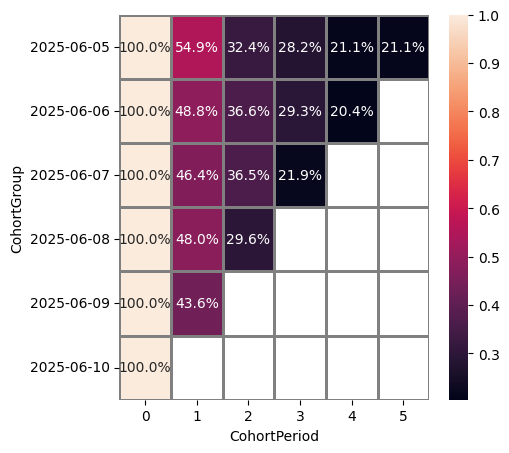

In [ ]:
from retentioneering.eventstream import Eventstream

stream.cohorts(
    cohort_start_unit='D',
    cohort_period=(1, 'D'),
    average=False
)

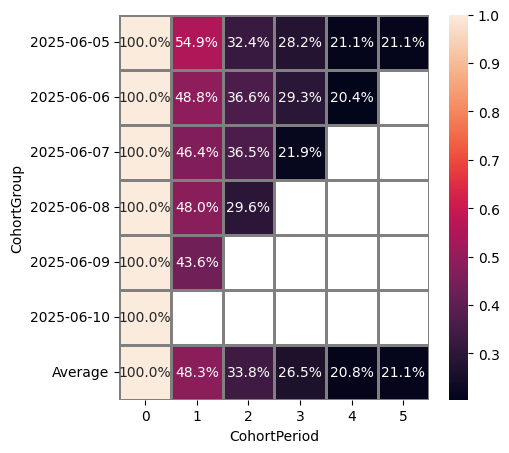

In [ ]:
stream.cohorts(
    cohort_start_unit='D',
    cohort_period=(1, 'D'),
    average=True
)

<Axes: xlabel='CohortPeriod', ylabel='CohortGroup'>

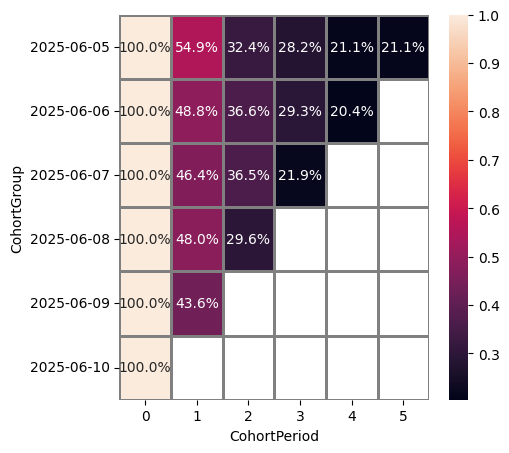

In [ ]:
from retentioneering.tooling.cohorts import Cohorts

cohorts = Cohorts(eventstream=stream)
cohorts.fit(
    cohort_start_unit='D',
    cohort_period=(1, 'D'),
    average=False
    )
cohorts.heatmap()

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

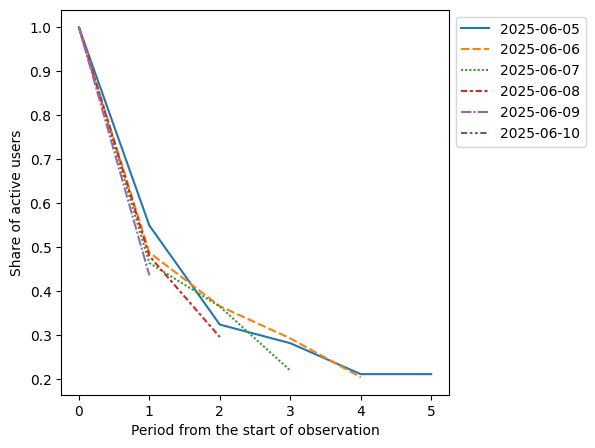

In [ ]:
cohorts.lineplot(width=5, height=5, plot_type='cohorts')

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

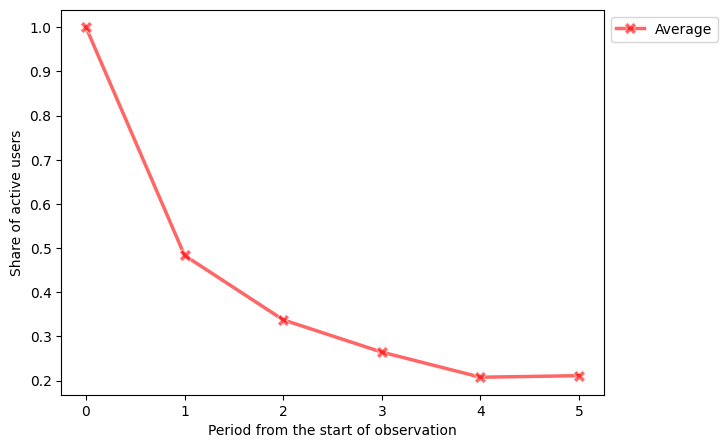

In [ ]:
cohorts.lineplot(width=7, height=5, plot_type='average')


# Funnel

In [ ]:
stream.funnel(stages=['start_level', 'ads_reward_complete', 'win_level'])
# Mặc định là funnel_type='open' → tức là chỉ cần người dùng có từng event xuất hiện trong data, không quan trọng thứ tự hoặc mối liên kết giữa các event.
# Mỗi user được xét một lần duy nhất.
# Một user được tính là đã đi qua stage kế tiếp nếu có sự kiện đó xảy ra sau stage trước đó.

## Stage grouping and stage name

In [32]:
# Gộp hành vi và đặt tên
stream.funnel(
    stages=['start_level', ['ads_reward_complete', 'booster_use'], 'win_level'],
    stage_names=['start_level', 'use_resource','win_level']
)

## Close, open, hybrid funnel

In [ ]:
# phễu mở bên trên

In [33]:
# Phễu đóng: yêu cầu người dùng phải thực hiện các hành vi (event) theo đúng thứ tự định sẵn, không cần liên tiếp, nhưng phải đầy đủ và theo trình tự.
# Ví dụ stages: ['A', 'B', 'C'] tức là user phải có chuỗi A → ... → B → ... → C.
# Closed funnel
# Gộp hành vi và đặt tên
stream.funnel(
    stages=['start_level', ['ads_reward_complete', 'booster_use'], 'win_level'],
    stage_names=['start_level', 'use_resource','win_level'],
    funnel_type='closed'
)

In [34]:
# Thể hiện phễu theo nhóm

stream_df = stream.to_dataframe()

# pandas.Series, indicies are user_ids, values are months when users appear
cohorts = stream_df.groupby('user_id').first()['timestamp'].dt.strftime('%Y-%m-%d') #  Xác định thời gian đầu tiên mỗi người dùng xuất hiện, theo định dạng YYYY-MM

group1 = cohorts[cohorts == '2025-06-07'].index.tolist()
group2 = cohorts[cohorts == '2025-06-08'].index.tolist()


stream.funnel(
    stages=['start_level', 'ads_reward_complete', 'win_level'],
    funnel_type='closed',
    groups=(group1, group2),
    group_names=('A', 'B')
)

# Segment

Mỗi segment có tên và bao gồm các giá trị segment (ví dụ: segment country có thể bao gồm các giá trị như US, CA, UK). Các segment có thể là:
- Static (Tĩnh): Giá trị của segment hợp lệ cho toàn bộ đường dẫn của người dùng. Ví dụ: giới tính người dùng, hoặc một dấu hiệu rõ ràng cho thấy người dùng đã trải qua một sự kiện cụ thể (như mua hàng hoặc thuộc một nhóm thử nghiệm A/B).
- Semi-static (Bán tĩnh): Về mặt kỹ thuật không hoàn toàn tĩnh nhưng thường xuất hiện như vậy. Ví dụ: quốc gia của người dùng. Mặc dù đôi khi có thể thay đổi (do chuyến đi hoặc sử dụng VPN), người dùng thường được coi là thuộc về quốc gia chiếm ưu thế của họ trong toàn bộ đường dẫn.
- Dynamic (Động): Giá trị của segment có thể thay đổi một cách tự nhiên trong quá trình của đường dẫn và có thể liên quan đến trạng thái của người dùng. Ví dụ: segment user_experience có 3 giá trị (newbie, advanced, experienced) có thể thay đổi khi người dùng tương tác với sản phẩm. Segment động cũng có thể chỉ ra những thay đổi trong toàn bộ eventstream, ví dụ như segment release_date để so sánh hành vi trước và sau khi triển khai tính năng mới

## Segment creation

### From column

In [ ]:
stream = stream.add_segment('country')
stream.to_dataframe(drop_segment_events=False)

event_id  event_type  event_index  \
0      4c7f4f63-f1dd-4208-8037-3c729463b852     segment            0   
1      f5dacdb8-1d3e-45c9-8317-a948ffde69e1  path_start            0   
2      f5dacdb8-1d3e-45c9-8317-a948ffde69e1         raw            0   
3      4405856d-ef31-4581-bc81-13ab4f640a28         raw            1   
4      27eb8908-7de5-4bee-9b3e-fa2c2d2a9540         raw            2   
...                                     ...         ...          ...   
44984  62cf6685-5cbe-46c8-b7d6-1e548c136907    path_end        38606   
44985  dca57c55-72b2-40aa-a91b-f52807017d96         raw        38607   
44986  d828d916-284f-4264-8273-7fe962d10790         raw        38608   
44987  67076e19-6210-48d3-871c-715d804296a6         raw        38609   
44988  67076e19-6210-48d3-871c-715d804296a6    path_end        38609   

                  event                  timestamp  \
0      country::Finland 2025-06-05 17:20:12.708161   
1            path_start 2025-06-05 17:20:12.708161   
2           start_level 2025-06-05 17:20:12.708161   
3          booster_gain 2025-06-05 17:20:14.361162   
4           booster_use 2025-06-05 17:20:17.739163   
...                 ...                        ...   
44984          path_end 2025-06-10 16:57:40.911315   
44985         win_level 2025-06-10 16:57:50.882490   
44986     resource_gain 2025-06-10 16:57:50.883491   
44987    ads_inter_show 2025-06-10 16:58:08.020497   
44988          path_end 2025-06-10 16:58:08.020497   

                                user_id  session_number  \
0      13252ef9b0d92c19efd957a6d6bebe76               1   
1      13252ef9b0d92c19efd957a6d6bebe76               1   
2      13252ef9b0d92c19efd957a6d6bebe76               1   
3      13252ef9b0d92c19efd957a6d6bebe76               1   
4      13252ef9b0d92c19efd957a6d6bebe76               1   
...                                 ...             ...   
44984  c40a4a4a9a9f5cd4e2e2fc58c99fc527               2   
44985  ce0c032833b6635de7356a77792b49cb               1   
44986  ce0c032833b6635de7356a77792b49cb               1   
44987  ce0c032833b6635de7356a77792b49cb               1   
44988  ce0c032833b6635de7356a77792b49cb               1   

                     event_param  
0                 start_level/14  
1                 start_level/14  
2                 start_level/14  
3         booster_gain/Fill_Free  
4               booster_use/Fill  
...                          ...  
44984     ads_inter_show/WinGame  
44985               win_level/15  
44986  resource_gain/10_Coin_Win  
44987     ads_inter_show/WinGame  
44988     ads_inter_show/WinGame  

[44989 rows x 8 columns]

### From Series

In [ ]:
# Giả sử ta đã segment được 2 list
list_good = [123, 456, 789]
list_not_good = [321, 654, 987]

In [ ]:
import pandas as pd

user_labels = pd.Series(
    {user_id: 'good' for user_id in list_good} |
    {user_id: 'not_good' for user_id in list_not_good},
    name='label'
)
stream_with_segment = stream.add_segment(user_labels)

### From function

In [ ]:
def add_purchased_segment(df):
    purchased_users = df[df['event'] == 'in_app_purchase']['user_id'].unique()
    has_purchase = df['user_id'].isin(purchased_users)
    return has_purchase

stream.add_segment(segment=add_purchased_segment, name='has_purchase')\
    .to_dataframe(drop_segment_events=False)

event_id  event_type  event_index  \
0      4c7f4f63-f1dd-4208-8037-3c729463b852     segment            0   
1      4afe8bdc-e629-42d8-84c6-7cdd6b58a1bd     segment            0   
2      f5dacdb8-1d3e-45c9-8317-a948ffde69e1  path_start            0   
3      f5dacdb8-1d3e-45c9-8317-a948ffde69e1         raw            0   
4      4405856d-ef31-4581-bc81-13ab4f640a28         raw            1   
...                                     ...         ...          ...   
47110  62cf6685-5cbe-46c8-b7d6-1e548c136907    path_end        38606   
47111  dca57c55-72b2-40aa-a91b-f52807017d96         raw        38607   
47112  d828d916-284f-4264-8273-7fe962d10790         raw        38608   
47113  67076e19-6210-48d3-871c-715d804296a6         raw        38609   
47114  67076e19-6210-48d3-871c-715d804296a6    path_end        38609   

                     event                  timestamp  \
0         country::Finland 2025-06-05 17:20:12.708161   
1      has_purchase::False 2025-06-05 17:20:12.708161   
2               path_start 2025-06-05 17:20:12.708161   
3              start_level 2025-06-05 17:20:12.708161   
4             booster_gain 2025-06-05 17:20:14.361162   
...                    ...                        ...   
47110             path_end 2025-06-10 16:57:40.911315   
47111            win_level 2025-06-10 16:57:50.882490   
47112        resource_gain 2025-06-10 16:57:50.883491   
47113       ads_inter_show 2025-06-10 16:58:08.020497   
47114             path_end 2025-06-10 16:58:08.020497   

                                user_id  session_number  \
0      13252ef9b0d92c19efd957a6d6bebe76               1   
1      13252ef9b0d92c19efd957a6d6bebe76               1   
2      13252ef9b0d92c19efd957a6d6bebe76               1   
3      13252ef9b0d92c19efd957a6d6bebe76               1   
4      13252ef9b0d92c19efd957a6d6bebe76               1   
...                                 ...             ...   
47110  c40a4a4a9a9f5cd4e2e2fc58c99fc527               2   
47111  ce0c032833b6635de7356a77792b49cb               1   
47112  ce0c032833b6635de7356a77792b49cb               1   
47113  ce0c032833b6635de7356a77792b49cb               1   
47114  ce0c032833b6635de7356a77792b49cb               1   

                     event_param  
0                 start_level/14  
1                 start_level/14  
2                 start_level/14  
3                 start_level/14  
4         booster_gain/Fill_Free  
...                          ...  
47110     ads_inter_show/WinGame  
47111               win_level/15  
47112  resource_gain/10_Coin_Win  
47113     ads_inter_show/WinGame  
47114     ads_inter_show/WinGame  

[47115 rows x 8 columns]

## Segment materizlization

Chuyển segment từ các sự kiện tổng hợp thành một cột rõ ràng trong eventstream bằng Eventstream.materialize_segment(

In [ ]:
stream.materialize_segment('country')\
    .to_dataframe(drop_segment_events=False)

event_id  event_type  event_index  \
0      4c7f4f63-f1dd-4208-8037-3c729463b852     segment            0   
1      f5dacdb8-1d3e-45c9-8317-a948ffde69e1  path_start            0   
2      f5dacdb8-1d3e-45c9-8317-a948ffde69e1         raw            0   
3      4405856d-ef31-4581-bc81-13ab4f640a28         raw            1   
4      27eb8908-7de5-4bee-9b3e-fa2c2d2a9540         raw            2   
...                                     ...         ...          ...   
44984  62cf6685-5cbe-46c8-b7d6-1e548c136907    path_end        38606   
44985  dca57c55-72b2-40aa-a91b-f52807017d96         raw        38607   
44986  d828d916-284f-4264-8273-7fe962d10790         raw        38608   
44987  67076e19-6210-48d3-871c-715d804296a6         raw        38609   
44988  67076e19-6210-48d3-871c-715d804296a6    path_end        38609   

                  event                  timestamp  \
0      country::Finland 2025-06-05 17:20:12.708161   
1            path_start 2025-06-05 17:20:12.708161   
2           start_level 2025-06-05 17:20:12.708161   
3          booster_gain 2025-06-05 17:20:14.361162   
4           booster_use 2025-06-05 17:20:17.739163   
...                 ...                        ...   
44984          path_end 2025-06-10 16:57:40.911315   
44985         win_level 2025-06-10 16:57:50.882490   
44986     resource_gain 2025-06-10 16:57:50.883491   
44987    ads_inter_show 2025-06-10 16:58:08.020497   
44988          path_end 2025-06-10 16:58:08.020497   

                                user_id  session_number  \
0      13252ef9b0d92c19efd957a6d6bebe76               1   
1      13252ef9b0d92c19efd957a6d6bebe76               1   
2      13252ef9b0d92c19efd957a6d6bebe76               1   
3      13252ef9b0d92c19efd957a6d6bebe76               1   
4      13252ef9b0d92c19efd957a6d6bebe76               1   
...                                 ...             ...   
44984  c40a4a4a9a9f5cd4e2e2fc58c99fc527               2   
44985  ce0c032833b6635de7356a77792b49cb               1   
44986  ce0c032833b6635de7356a77792b49cb               1   
44987  ce0c032833b6635de7356a77792b49cb               1   
44988  ce0c032833b6635de7356a77792b49cb               1   

                     event_param  country  
0                 start_level/14  Finland  
1                 start_level/14  Finland  
2                 start_level/14  Finland  
3         booster_gain/Fill_Free  Finland  
4               booster_use/Fill  Finland  
...                          ...      ...  
44984     ads_inter_show/WinGame   Russia  
44985               win_level/15    Nepal  
44986  resource_gain/10_Coin_Win    Nepal  
44987     ads_inter_show/WinGame    Nepal  
44988     ads_inter_show/WinGame    Nepal  

[44989 rows x 9 columns]

## Segment removal

 Xóa tất cả các sự kiện tổng hợp liên quan đến một segment bằng Eventstream.drop_segment()

In [ ]:
stream.drop_segment('country')\
    .to_dataframe(drop_segment_events=False)

event_id  event_type  event_index  \
0      f5dacdb8-1d3e-45c9-8317-a948ffde69e1  path_start            0   
1      f5dacdb8-1d3e-45c9-8317-a948ffde69e1         raw            0   
2      4405856d-ef31-4581-bc81-13ab4f640a28         raw            1   
3      27eb8908-7de5-4bee-9b3e-fa2c2d2a9540         raw            2   
4      88ffc325-a88f-4e18-972b-23c401b8a417         raw            3   
...                                     ...         ...          ...   
42857  62cf6685-5cbe-46c8-b7d6-1e548c136907    path_end        38606   
42858  dca57c55-72b2-40aa-a91b-f52807017d96         raw        38607   
42859  d828d916-284f-4264-8273-7fe962d10790         raw        38608   
42860  67076e19-6210-48d3-871c-715d804296a6         raw        38609   
42861  67076e19-6210-48d3-871c-715d804296a6    path_end        38609   

                event                  timestamp  \
0          path_start 2025-06-05 17:20:12.708161   
1         start_level 2025-06-05 17:20:12.708161   
2        booster_gain 2025-06-05 17:20:14.361162   
3         booster_use 2025-06-05 17:20:17.739163   
4        box_complete 2025-06-05 17:20:18.026164   
...               ...                        ...   
42857        path_end 2025-06-10 16:57:40.911315   
42858       win_level 2025-06-10 16:57:50.882490   
42859   resource_gain 2025-06-10 16:57:50.883491   
42860  ads_inter_show 2025-06-10 16:58:08.020497   
42861        path_end 2025-06-10 16:58:08.020497   

                                user_id  session_number  \
0      13252ef9b0d92c19efd957a6d6bebe76               1   
1      13252ef9b0d92c19efd957a6d6bebe76               1   
2      13252ef9b0d92c19efd957a6d6bebe76               1   
3      13252ef9b0d92c19efd957a6d6bebe76               1   
4      13252ef9b0d92c19efd957a6d6bebe76               1   
...                                 ...             ...   
42857  c40a4a4a9a9f5cd4e2e2fc58c99fc527               2   
42858  ce0c032833b6635de7356a77792b49cb               1   
42859  ce0c032833b6635de7356a77792b49cb               1   
42860  ce0c032833b6635de7356a77792b49cb               1   
42861  ce0c032833b6635de7356a77792b49cb               1   

                     event_param  
0                 start_level/14  
1                 start_level/14  
2         booster_gain/Fill_Free  
3               booster_use/Fill  
4                box_complete/14  
...                          ...  
42857     ads_inter_show/WinGame  
42858               win_level/15  
42859  resource_gain/10_Coin_Win  
42860     ads_inter_show/WinGame  
42861     ads_inter_show/WinGame  

[42862 rows x 8 columns]

## Segment filtering

Filtering (Lọc): Lọc tất cả các sự kiện liên quan đến một giá trị segment cụ thể bằng Eventstream.filter_events() với đối số segment. Đối số này phải là một danh sách gồm hai phần tử: tên segment và giá trị segment

In [ ]:
stream.filter_events(segment=['country', 'United States'])\
    .to_dataframe(drop_segment_events=False)

event_id  event_type  event_index  \
0     9efcafcf-a758-4486-b55a-7bec77f96fc6     segment          331   
1     44095662-7bc6-4ae0-99aa-278ceaf23317  path_start          331   
2     44095662-7bc6-4ae0-99aa-278ceaf23317         raw          331   
3     f5aea246-3968-4f3c-8bc9-75f034f63675         raw          333   
4     f86f2fac-97f5-473e-8f46-57c223c82fee         raw          334   
...                                    ...         ...          ...   
4816  d23a262e-57af-43c9-93fc-6fb30c32d5fb         raw        38539   
4817  8695cef9-e86d-49b7-81e1-4f3212c67181         raw        38544   
4818  791a23a6-f7a3-4c9c-99a3-d886bbb22cbc         raw        38545   
4819  eb42ba57-7bff-4769-a423-2b4ef49f7873         raw        38548   
4820  eb42ba57-7bff-4769-a423-2b4ef49f7873    path_end        38548   

                       event                  timestamp  \
0     country::United States 2025-06-05 19:39:58.741590   
1                 path_start 2025-06-05 19:39:58.741590   
2                start_level 2025-06-05 19:39:58.741590   
3               booster_gain 2025-06-05 19:40:03.449591   
4                booster_use 2025-06-05 19:40:06.308592   
...                      ...                        ...   
4816            box_complete 2025-06-10 16:40:14.408618   
4817               win_level 2025-06-10 16:42:28.863650   
4818           resource_gain 2025-06-10 16:42:28.864651   
4819          ads_inter_show 2025-06-10 16:43:19.453659   
4820                path_end 2025-06-10 16:43:19.453659   

                               user_id  session_number  \
0     fa5cb52aca384f6fb6d491c194a24ca6               1   
1     fa5cb52aca384f6fb6d491c194a24ca6               1   
2     fa5cb52aca384f6fb6d491c194a24ca6               1   
3     fa5cb52aca384f6fb6d491c194a24ca6               1   
4     fa5cb52aca384f6fb6d491c194a24ca6               1   
...                                ...             ...   
4816  a23477ffb2c998af7d86b0e03ce9dc74               1   
4817  a23477ffb2c998af7d86b0e03ce9dc74               1   
4818  a23477ffb2c998af7d86b0e03ce9dc74               1   
4819  a23477ffb2c998af7d86b0e03ce9dc74               1   
4820  a23477ffb2c998af7d86b0e03ce9dc74               1   

                    event_param  
0                start_level/14  
1                start_level/14  
2                start_level/14  
3        booster_gain/Fill_Free  
4              booster_use/Fill  
...                         ...  
4816            box_complete/15  
4817               win_level/15  
4818  resource_gain/10_Coin_Win  
4819     ads_inter_show/WinGame  
4820     ads_inter_show/WinGame  

[4821 rows x 8 columns]

## Segment mapping

In [ ]:
stream.segment_map(name='country', index='path_id')

user_id
000bf37921eebc0202d5c6427b182246           Mexico
003e2b99ae7f3992ee861c5549535743         Bulgaria
006bc68441f028b81670192930f1c270    United States
007f17cfa6f9a2483e73dda976a44c6e         Thailand
00c8521992caa3d0a85213d5df622557        Indonesia
                                        ...      
ffd6736d324618c24b59c14377fae9e9          Türkiye
ffdb15a2a5438c16c7df6d03d5856074           Russia
ffe07798a4fd9d1fbc703bd0871025af           Russia
fff46e0ab4281e022f8aa1b25c171ba2           Russia
fff885dcfadb99e6eb33e281bb84dad8           Brazil
Name: segment_value, Length: 2127, dtype: object

In [ ]:
stream.segment_map(name='country', index='segment_value')

segment_value
Antigua & Barbuda    d82343c3e0d3d2c0a2d3ad84752167b7
Argentina            41978687485649d03a56d1e17428b22a
Argentina            d88aea3f5882c493b44adcf5a7d78971
Argentina            341cd041feeae9193371ba4c24205eeb
Argentina            d47262ee17f000f66ddc9cc6a48a6869
                                   ...               
Uruguay              22f8e42c2ce8ca6ee0bb725f12493208
Venezuela            64e33c3329afd4ea34d731e915dab91d
Vietnam              ef029a79484f42b632e7def497bbb1b4
Vietnam              48a314eda575d7f2465b257422e627cb
Vietnam              2F14A43524924FBDB2E134E3E8BF05B5
Name: user_id, Length: 2127, dtype: object

In [ ]:
stream.segment_map(name='country', index='path_id', resolve_collision='majority')


user_id
000bf37921eebc0202d5c6427b182246           Mexico
003e2b99ae7f3992ee861c5549535743         Bulgaria
006bc68441f028b81670192930f1c270    United States
007f17cfa6f9a2483e73dda976a44c6e         Thailand
00c8521992caa3d0a85213d5df622557        Indonesia
                                        ...      
ffd6736d324618c24b59c14377fae9e9          Türkiye
ffdb15a2a5438c16c7df6d03d5856074           Russia
ffe07798a4fd9d1fbc703bd0871025af           Russia
fff46e0ab4281e022f8aa1b25c171ba2           Russia
fff885dcfadb99e6eb33e281bb84dad8           Brazil
Name: segment_value, Length: 2126, dtype: object

## Segment usage

In [ ]:
# Giả sử những user có hành vi lần đầu vào 2025-06-08 -> Gán nó là user mới
def add_segment_by_date(df):
    first_day = df.groupby('user_id')['timestamp'].min()
    target_index = first_day[first_day < '2025-06-08'].index
    segment_values = df['user_id'].isin(target_index)
    segment_values = segment_values.map({True: 'Before 06-08', False: 'After 06-08'})
    return segment_values

stream = stream.add_segment(add_segment_by_date, name='20250608')

In [ ]:
custom_metrics = [
    ('segment_size', 'mean', 'segment size'),
    ('has:booster_use', 'mean', 'Conversion rate: booster_use'),
    ('has:in_app_purchase', 'mean', 'Conversion rate: in_app_purchase')
]
stream.segment_overview('20250608', metrics=custom_metrics)

In [ ]:
stream.segment_overview(
    segment_name='20250608',
    metrics=custom_metrics,
    kind='heatmap',
    show_plot=False
).values

20250608                         After 06-08 Before 06-08
segment size                           0.606        0.394
Conversion rate: booster_use           0.988        0.979
Conversion rate: in_app_purchase         0.0          0.0

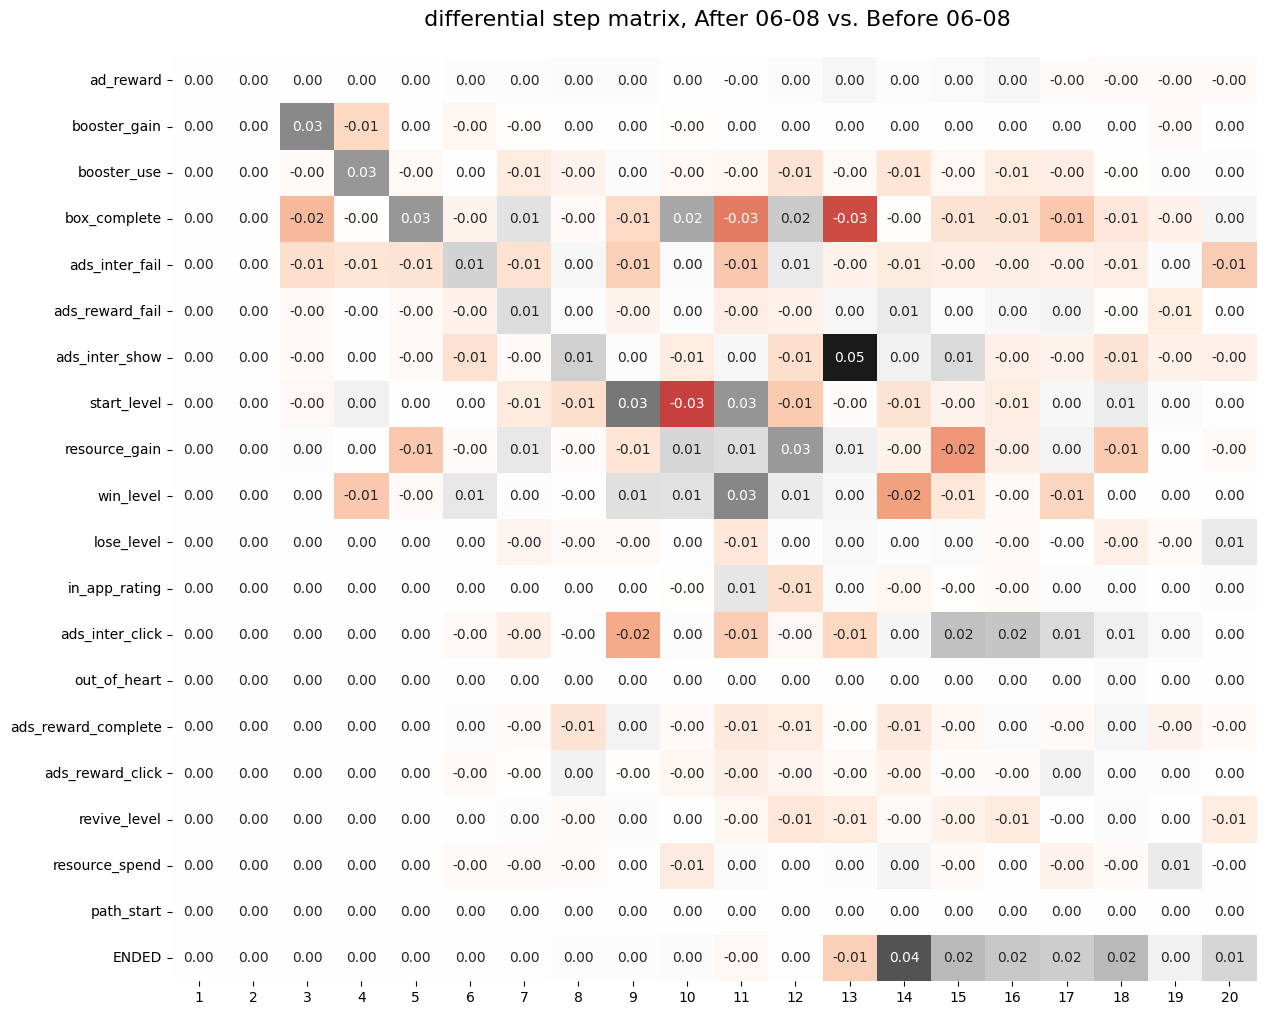

In [ ]:
stream.step_matrix(groups='20250608', threshold=0)

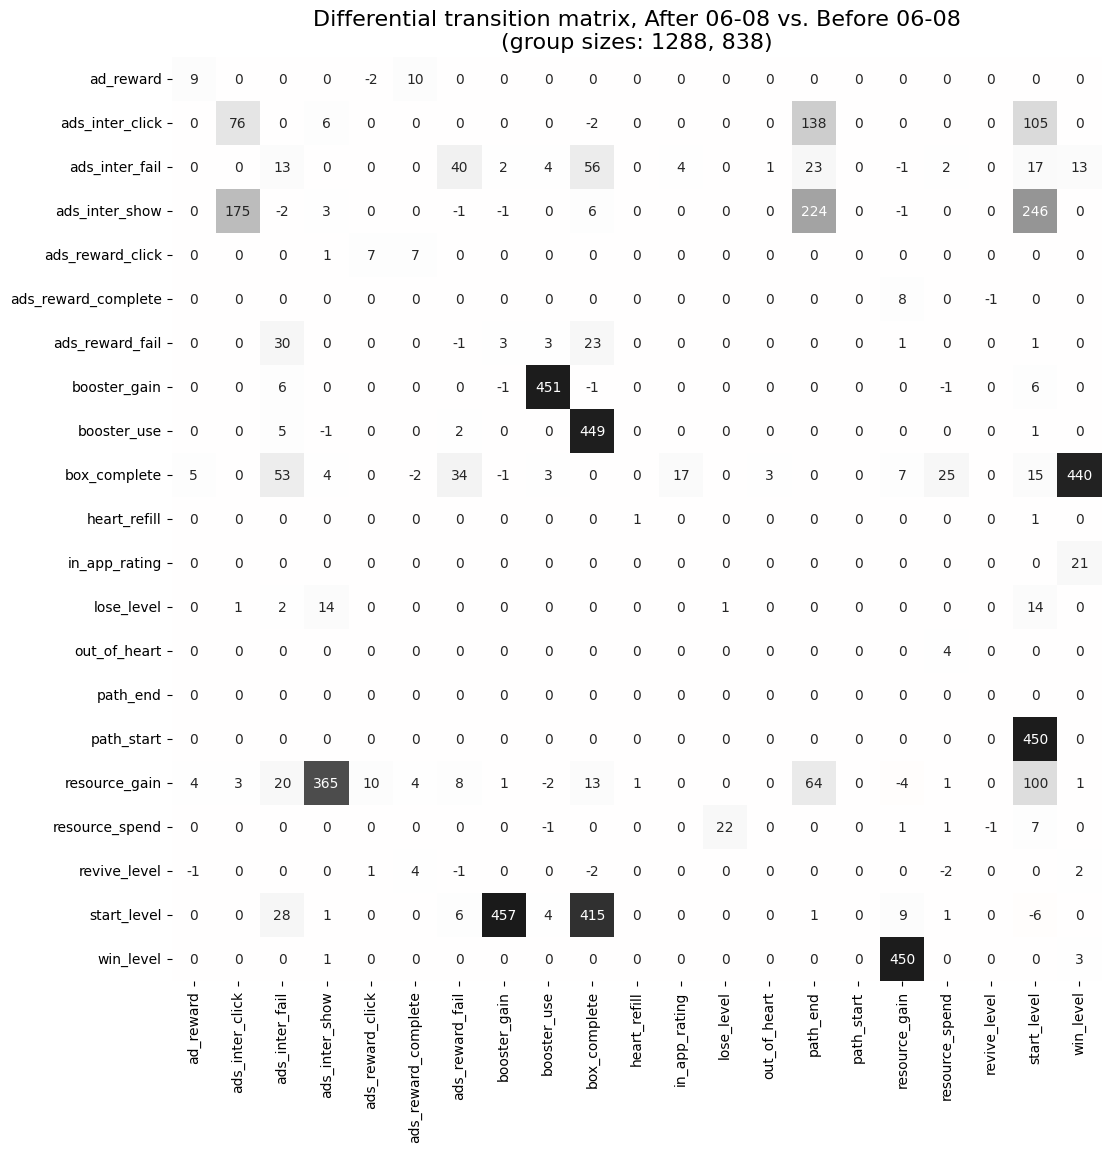

In [ ]:
stream.transition_matrix(groups='20250608')


# Cluster

## Vectorization

In [ ]:
features = stream.extract_features(ngram_range=(1, 1), feature_type='count')

In [ ]:
features

ad_reward  ads_inter_click  ads_inter_fail  \
user_id                                                                        
000bf37921eebc0202d5c6427b182246          0                0               3   
003e2b99ae7f3992ee861c5549535743          0                0               0   
006bc68441f028b81670192930f1c270          0                1               0   
007f17cfa6f9a2483e73dda976a44c6e          0                0               0   
00c8521992caa3d0a85213d5df622557          0                0              70   
...                                     ...              ...             ...   
ffd6736d324618c24b59c14377fae9e9          0                0               0   
ffdb15a2a5438c16c7df6d03d5856074          0                3               0   
ffe07798a4fd9d1fbc703bd0871025af          0                0               0   
fff46e0ab4281e022f8aa1b25c171ba2          0                2               0   
fff885dcfadb99e6eb33e281bb84dad8          0                0              34   

                                  ads_inter_show  ads_reward_click  \
user_id                                                              
000bf37921eebc0202d5c6427b182246               0                 0   
003e2b99ae7f3992ee861c5549535743               2                 0   
006bc68441f028b81670192930f1c270               2                 0   
007f17cfa6f9a2483e73dda976a44c6e               2                 0   
00c8521992caa3d0a85213d5df622557               0                 0   
...                                          ...               ...   
ffd6736d324618c24b59c14377fae9e9               0                 0   
ffdb15a2a5438c16c7df6d03d5856074               2                 0   
ffe07798a4fd9d1fbc703bd0871025af               2                 0   
fff46e0ab4281e022f8aa1b25c171ba2               2                 0   
fff885dcfadb99e6eb33e281bb84dad8               0                 0   

                                  ads_reward_complete  ads_reward_fail  \
user_id                                                                  
000bf37921eebc0202d5c6427b182246                    0                3   
003e2b99ae7f3992ee861c5549535743                    0                0   
006bc68441f028b81670192930f1c270                    0                0   
007f17cfa6f9a2483e73dda976a44c6e                    0                0   
00c8521992caa3d0a85213d5df622557                    0               16   
...                                               ...              ...   
ffd6736d324618c24b59c14377fae9e9                    0                0   
ffdb15a2a5438c16c7df6d03d5856074                    0                0   
ffe07798a4fd9d1fbc703bd0871025af                    0                0   
fff46e0ab4281e022f8aa1b25c171ba2                    0                0   
fff885dcfadb99e6eb33e281bb84dad8                    0                5   

                                  booster_gain  booster_use  box_complete  \
user_id                                                                     
000bf37921eebc0202d5c6427b182246             1            1             4   
003e2b99ae7f3992ee861c5549535743             1            1             2   
006bc68441f028b81670192930f1c270             1            1             2   
007f17cfa6f9a2483e73dda976a44c6e             1            1             2   
00c8521992caa3d0a85213d5df622557             1            1            24   
...                                        ...          ...           ...   
ffd6736d324618c24b59c14377fae9e9             1            1             2   
ffdb15a2a5438c16c7df6d03d5856074             1            2             3   
ffe07798a4fd9d1fbc703bd0871025af             1            1             2   
fff46e0ab4281e022f8aa1b25c171ba2             1            1             2   
fff885dcfadb99e6eb33e281bb84dad8             1            1            19   

                                  ...  in_app_rating  lose_level  \
user_id                           ...            

## Clustering algorithms

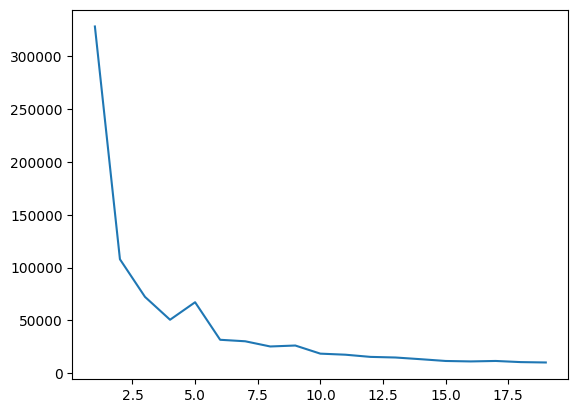

In [ ]:
stream.get_clusters(features, method='kmeans')

In [ ]:
stream2 = stream.get_clusters(
    features,
    method='kmeans',
    n_clusters=6,
    random_state=42,
    segment_name='kmeans_clusters'
)

## Cluster analysis

In [ ]:
stream2.clusters_overview('kmeans_clusters', features, aggfunc='mean', metrics=custom_metrics)

In [ ]:
# So sánh riêng 2 cụm nếu thấy 2 cụm khá giống nhau
stream2.segment_diff(['kmeans_clusters', '2', '1'], features)


In [ ]:
# So sánh sự khác biệt của 1 cụm với các cụm còn lại
stream2.segment_diff(['kmeans_clusters', '2', '_OUTER_'], features)

In [ ]:
# gán tên cho từng cluster
cluster_labels = {
    '0': 'A',
    '1': 'B',
    '2': 'C',
    '3': 'D',
    '4': 'E',
    '5': 'F',
    '6': 'G'
}
stream2 = stream2.remap_segment('kmeans_clusters', cluster_labels)

In [ ]:
stream2.projection(features=features, sample_size=2000, random_state=42)

# Sequences

In [16]:
stream.sequences()


In [18]:
stream\
    .split_sessions(timeout=(30, 'm'))\   # Chia session , sau 30p là 1 session mới
    .sequences(
        ngram_range=(10, 20), # IN ra các chuỗi có độ dài 10 hoặc 20
        weight_col='session_id', # Tính các chỉ số theo session, có thể là mean
        metrics=['count', 'count_share', 'paths_share'],
        threshold=['count', 50], # Chỉ in ra các chuỗi có số lượng >= 50
        sorting=['count_share', False], # IN ra theo chiều desc
        heatmap_cols=['session_id_share'], # Tạo heatmap cho 1 cột cụ thể
        sample_size=3
    )

In [19]:
# So sánh nhóm
# Tạo 2 nhóm ngẫu nhiên
np.random.seed(111)
users = set(stream.to_dataframe()['user_id'])
group1 = set(np.random.choice(list(users), size=len(users)//2))
group2 = users - group1

In [22]:
stream.sequences(
    groups=[group1, group2],
    group_names=['A', 'B'],
    metrics=['paths_share', 'count_share'],
    threshold=[('user_id_share', 'delta_abs'), 0],
    sorting=[('count_share', 'delta_rel'), False]
)

In [24]:
# Get df
seq_df = stream.sequences(show_plot=False).values
seq_df

user_id  user_id_share  count  count_share  avg_count  \
Sequence                                                                     
win_level               1373           1.00   4134         0.10       3.01   
resource_gain           1373           1.00   4457         0.11       3.25   
path_start              1373           1.00   1373         0.03       1.00   
path_end                1373           1.00   1373         0.03       1.00   
start_level             1373           1.00   5177         0.13       3.77   
box_complete            1372           1.00   8117         0.20       5.92   
ads_inter_show          1125           0.82   2862         0.07       2.54   
ads_inter_click          666           0.49   1635         0.04       2.45   
booster_use              599           0.44    887         0.02       1.48   
resource_spend           583           0.42   1012         0.02       1.74   
revive_level             340           0.25    551         0.01       1.62   
lose_level               303           0.22    517         0.01       1.71   
ads_reward_complete      259           0.19    542         0.01       2.09   
ads_inter_fail           226           0.16   6731         0.16      29.78   
ads_reward_fail          168           0.12    908         0.02       5.40   
ads_reward_click         138           0.10    509         0.01       3.69   
booster_gain              50           0.04     85         0.00       1.70   
ad_reward                 32           0.02     85         0.00       2.66   
out_of_heart              22           0.02     29         0.00       1.32   
heart_refill               5           0.00     14         0.00       2.80   

                    sequence_type                      user_id_sample  
Sequence                                                               
win_level                   other  [4f833abad0448a5ab41d78983c0087a5]  
resource_gain               other  [4f833abad0448a5ab41d78983c0087a5]  
path_start                  other  [4f833abad0448a5ab41d78983c0087a5]  
path_end                    other  [4f833abad0448a5ab41d78983c0087a5]  
start_level                 other  [4f833abad0448a5ab41d78983c0087a5]  
box_complete                other  [4fb716e32479463439137ec5a91f4485]  
ads_inter_show              other  [f6f529c78486d2502abfc5a50400121c]  
ads_inter_click             other  [e0c9f4a26a796301f50ac0e1d98b21f1]  
booster_use                 other  [2c801a5b8cf9a0176a634725697efeaf]  
resource_spend              other  [9B6520F85C2040989D0BECB64D4DF5CB]  
revive_level                other  [d40d5ceafdd0945a1b3df22500d6cf55]  
lose_level                  other  [9e1f6fe04895ced88e2c80cb37894124]  
ads_reward_complete         other  [479da0438cca3e8ad9abcd6fbe0c7afd]  
ads_inter_fail              other  [0871408fb2a962ad9a357dec2cbbfbb4]  
ads_reward_fail             other  [d40d5ceafdd0945a1b3df22500d6cf55]  
ads_reward_click            other  [973bac4f931efcc6893267509b9b9813]  
booster_gain                other  [405c7333edb3ff0669ca07e76f922f45]  
ad_reward                   other  [f63c7cee275a7cd3f285b1164c07e631]  
out_of_heart                other  [09eeabdedd57c1a38e6371c5ba5da6f6]  
heart_refill                other  [4cdc97c2668ce1205cea51a35cf3f97b]

# Step matrix

Ta hiểu cái biểu đồ này cho biết tại step x, có bao nhiêu % là event A, B,...

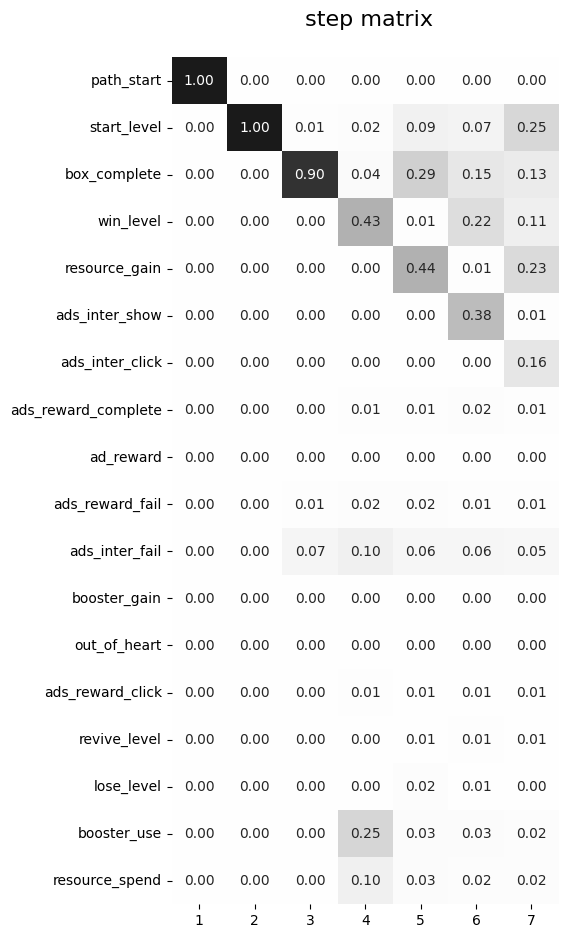

In [27]:
stream\
    .step_matrix(max_steps=7, threshold=0);

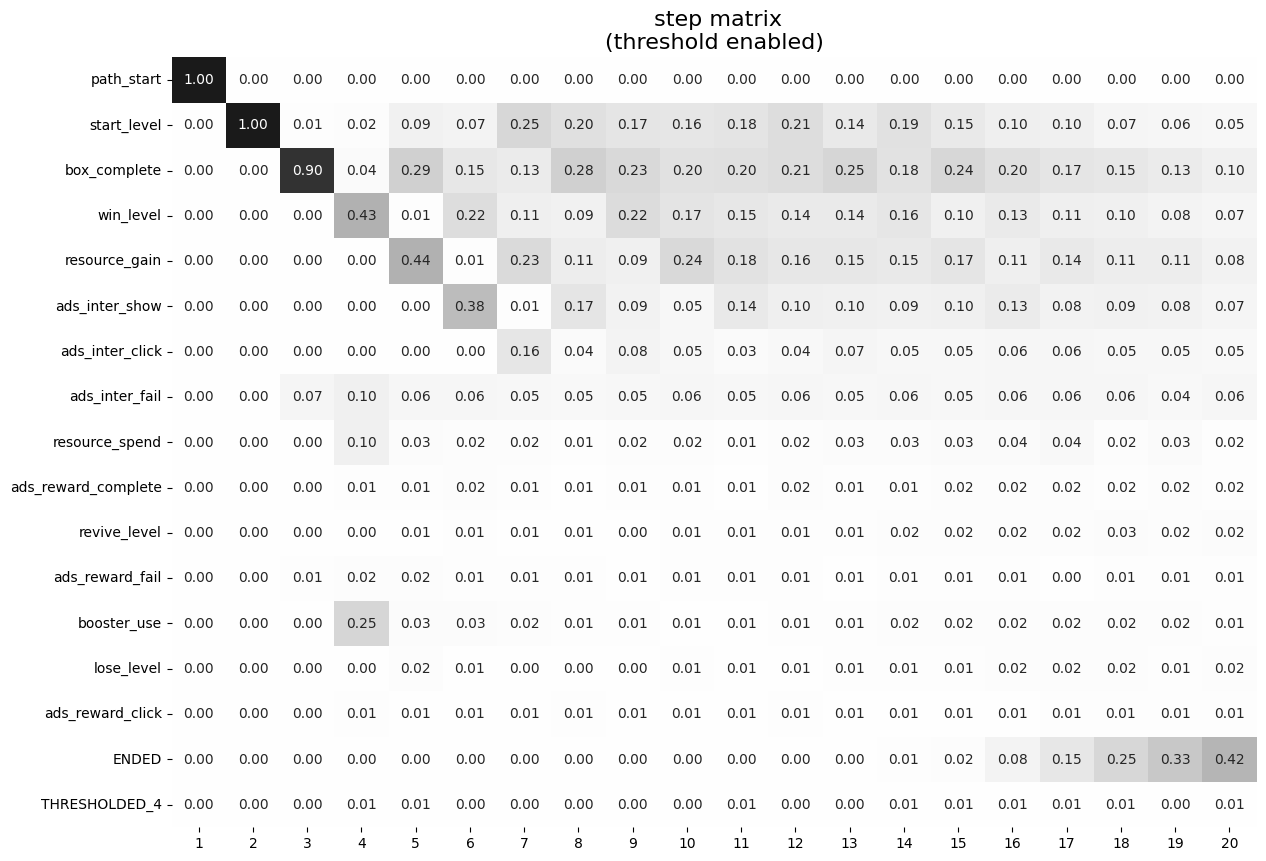

In [28]:
stream\
    .step_matrix(max_steps=20, threshold=0.01);

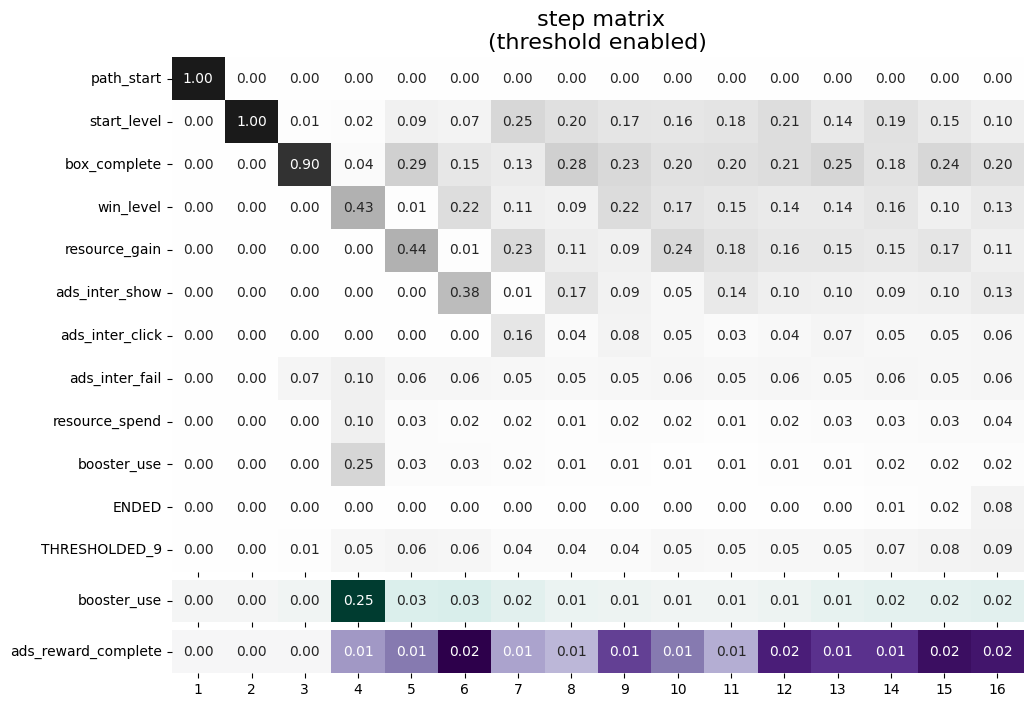

In [29]:
stream.step_matrix(
    max_steps=16,
    threshold=0.03,
    targets=['booster_use','ads_reward_complete'] # Để vẫn có thể show ra cái event này trong TH nó < threshold vì nó là event quan trọng, và show nó nổi bật
)

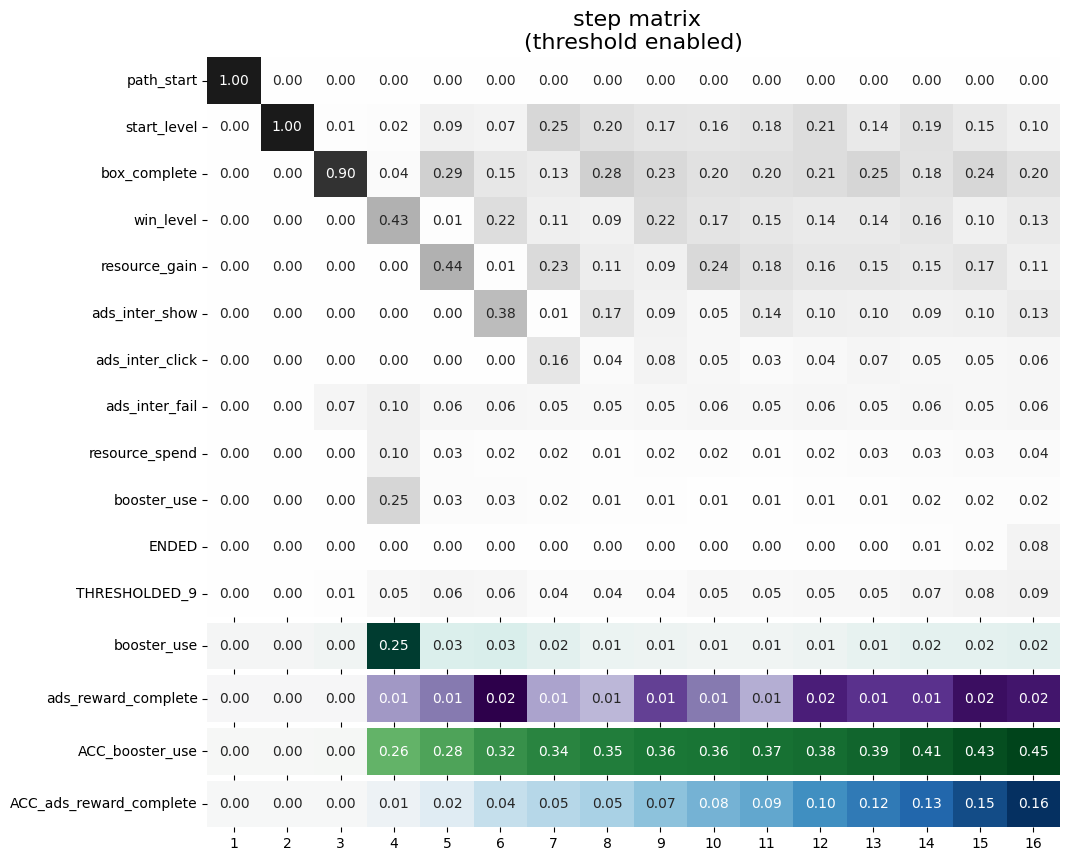

In [31]:
# Accumlate
stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    targets=['booster_use','ads_reward_complete'],
    accumulated='both'
)

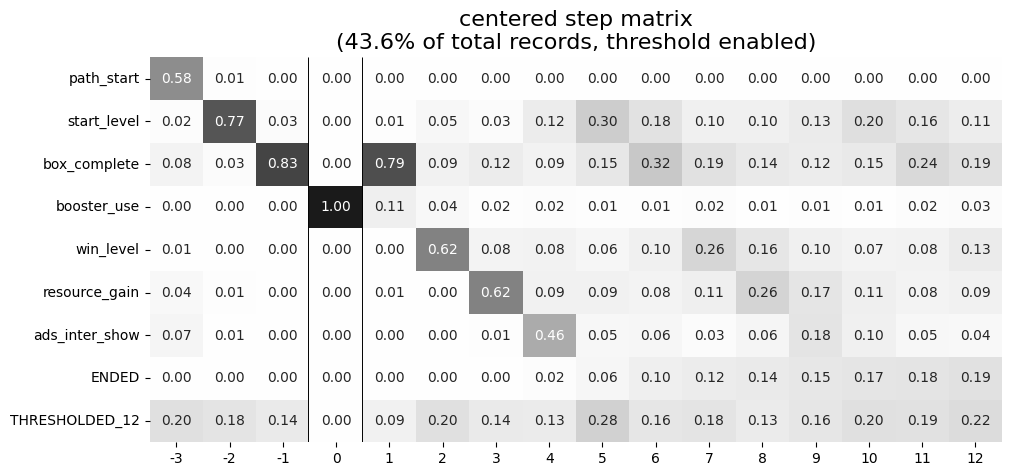

In [35]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'booster_use', # Xác định sự kiện trung tâm là booster_use, muốn xem điều gì xảy ra trước khi user click vào giỏ hành
        'left_gap': 3, # Xem 3 bước sự kiện trước khi booster_use xảy ra
        'occurrence': 1 # Chỉ xét lần đầu tiên booser_use xảy ra trong mỗi session
    }
)
# Trong biểu đồ dưới, 43,6% user đã có hành vi booster_use ít nhất 1 lần

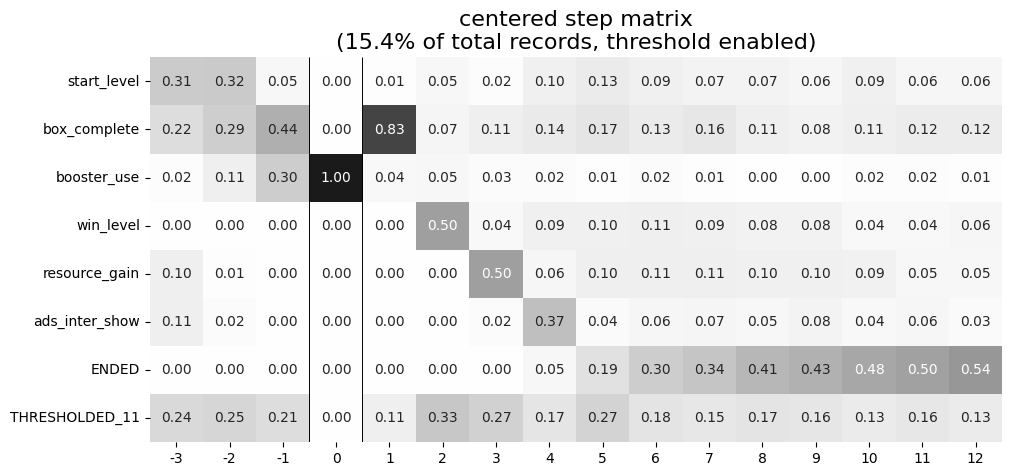

In [36]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'booster_use', # Xác định sự kiện trung tâm là booster_use, muốn xem điều gì xảy ra trước khi user click vào giỏ hành
        'left_gap': 3, # Xem 3 bước sự kiện trước khi booster_use xảy ra
        'occurrence': 2 # Chỉ xét lần thứ 2 booser_use xảy ra trong mỗi session
    }
)
# Trong biểu đồ dưới, 15,4% user đã có hành vi booster_use ít nhất 2 lần, và đây cũng là hành vi phổ biến của chúng nó, 1 lũ ngu

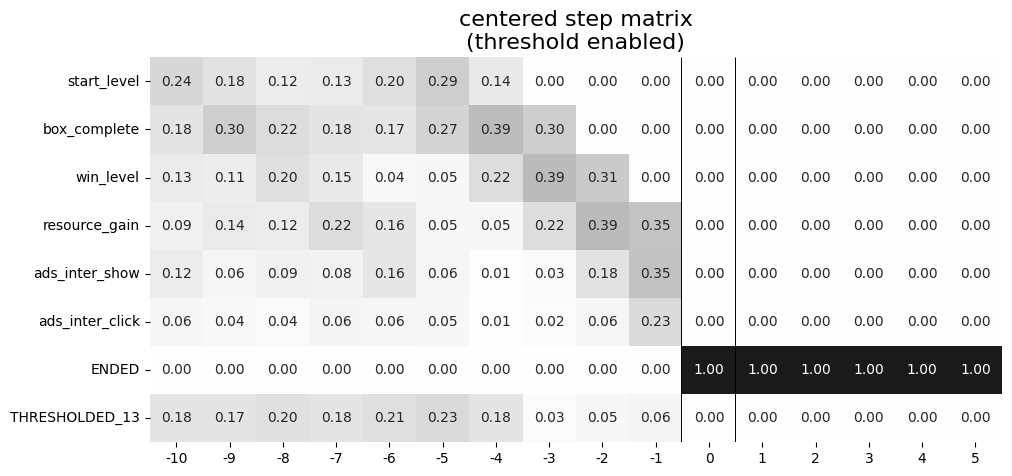

In [38]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'ENDED', # Xác định sự kiện trung tâm là booster_use, muốn xem điều gì xảy ra trước khi user click vào giỏ hành
        'left_gap': 10, # Xem 3 bước sự kiện trước khi booster_use xảy ra
        'occurrence': 1 # Chỉ xét lần thứ 1 booser_use xảy ra trong mỗi session
    }
)

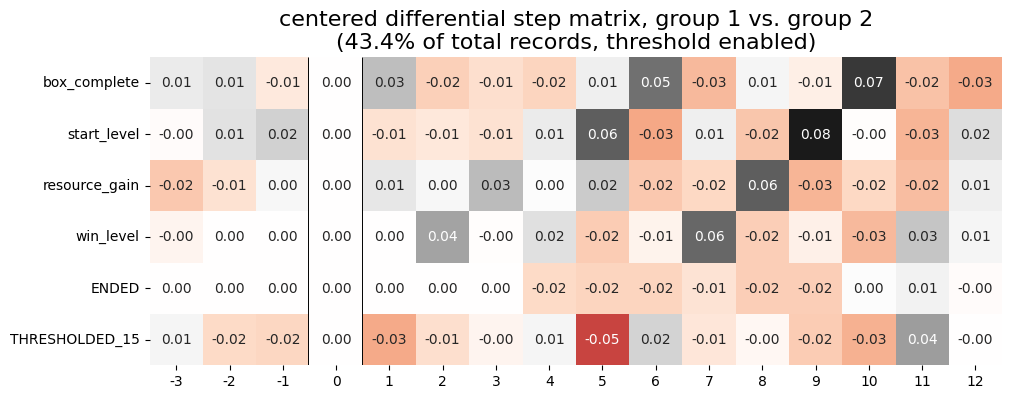

In [39]:
# So sánh 2 tệp
# So sánh nhóm
# Tạo 2 nhóm ngẫu nhiên
np.random.seed(111)
users = set(stream.to_dataframe()['user_id'])
group1 = set(np.random.choice(list(users), size=len(users)//2))
group2 = users - group1

stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    centered={
        'event': 'booster_use',
        'left_gap': 3,
        'occurrence': 1
    },
    groups=(group1, group2)
)

# StepSankey

In [40]:
stream.step_sankey(max_steps=5)


In [45]:
stream.step_sankey(max_steps=5, threshold= 0.1)

# Transition matrix

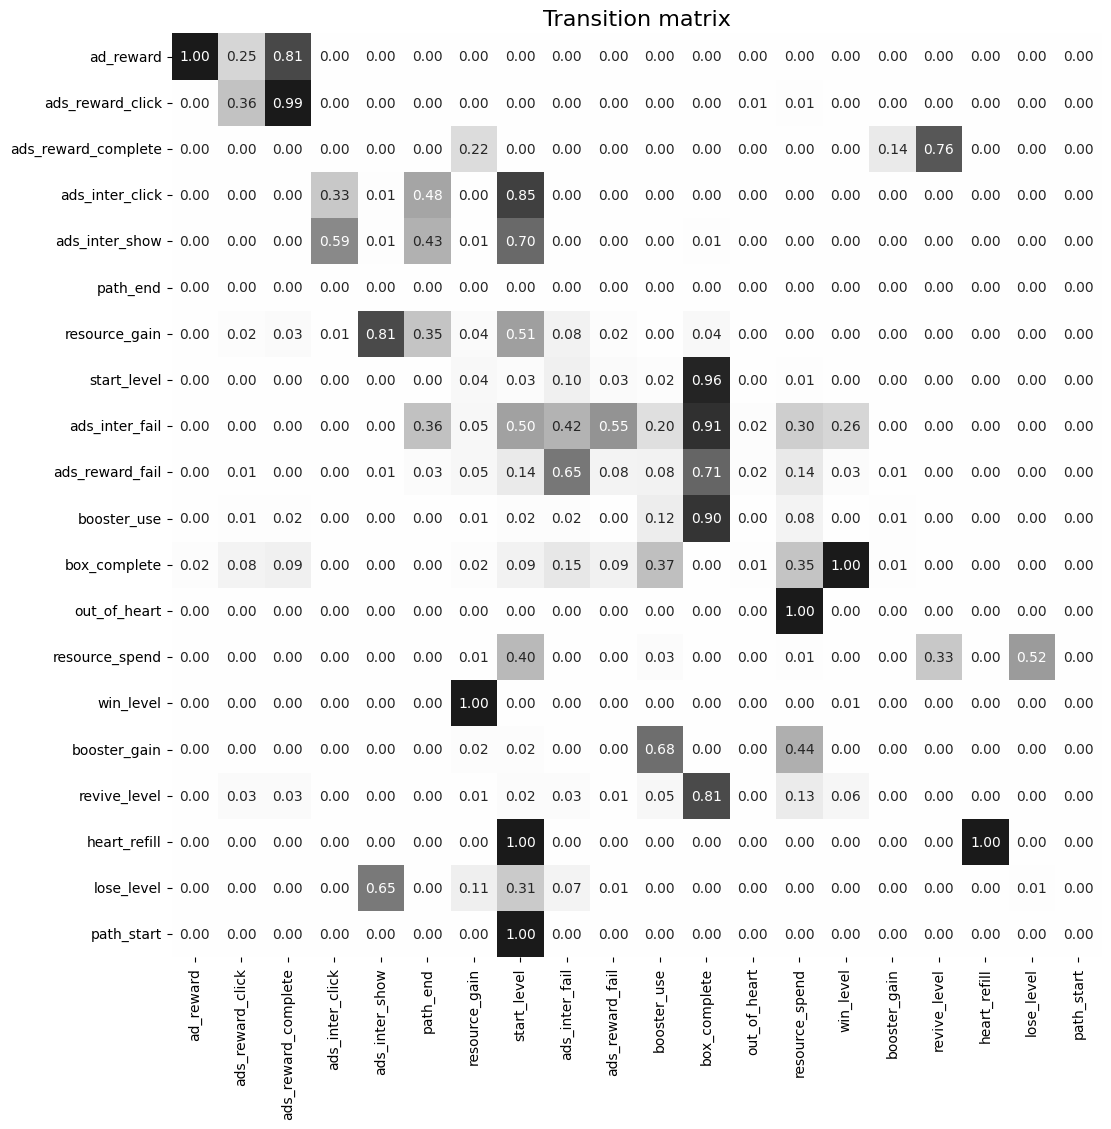

In [46]:
stream.transition_matrix(norm_type='node', weight_col='user_id')